# Analyzing IPL Trends: Insights from 2008 to 2019
#### By *Saurabh Kudesia* | Oct 2024 
[![GitHub](https://img.shields.io/badge/GitHub-100000?style=flat&logo=github&logoColor=white)](https://github.com/saurabh-kudesia) [![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=flat&logo=kaggle&logoColor=white)](https://www.kaggle.com/saurabhkudesia) [![LinkedIn](https://img.shields.io/badge/LinkedIn-0A66C2?style=flat&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/saurabhkudesia/)


---
© 2024 Saurabh Kudesia

*This project is licensed under the [MIT License](https://opensource.org/licenses/MIT). You are free to use, modify, and distribute this code, provided you include proper attribution and retain the license notice.* 

[![License: MIT](https://img.shields.io/badge/License-MIT-blue.svg)](https://opensource.org/licenses/MIT) 

<img src="https://images.unsplash.com/photo-1594470117722-de4b9a02ebed?q=80&w=2029&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="Netflix_cover" width="100%" style="margin-bottom: 10px;">

*Image Courtsey: [Unsplash.com](https://unsplash.com)*

## Project Snapshot
------------------------
The Indian Premier League (IPL) is a premier professional Twenty20 cricket league in India, established in 2008. It showcases teams from various cities and regions, typically running annually from March to May. Renowned for its thrilling matches and featuring star players from around the globe, the IPL has become one of the most lucrative cricket leagues in the world, attracting substantial financial investments.

This project aims to analyze IPL data from 2008 to 2019, focusing on key metrics to uncover actionable insights and trends. The goal is to enhance our understanding of the league's dynamics and provide valuable information about it.

## Import Libraries and Configure Common Settings
------------------------

In [1]:
# Import libraries
import numpy as np
import pandas as pd

from datetime import datetime
import time

import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
# General setup

# Display figures directly inline
%matplotlib inline

# Restrict float values to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Ignore warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the data file and load its contents into a DataFrame
df= pd.read_csv('/kaggle/input/ipl-trends-2008-2019/matches.csv')

## Data Review
------------------------

In [4]:
# View the first five rows of the dataset
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# View the last five rows of the dataset
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [6]:
# How many rows and columns are present in the data?
df.shape
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns') 

There are 756 rows and 18 columns


In [7]:
# Get information about columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

**Observations**

The given dataset has the following data types:
- **Five numerical columns**: *id*, *season*, *dl_applied*, *win_by_runs*, *win_by_wickets'
- **Thirteen object type columns**: *city*, *date*, *team1*, *team2*, *toss_winner*, *toss_decision*, 'result', *winner*, *player_of_match*, *venue*, *umpire1*, *umpire2*,*umpire3*

In [8]:
# Get the statistical summary of the data
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.00,756.00,756.00,756.00,756.00
mean,1792.18,2013.44,0.03,13.28,3.35
std,3464.48,3.37,0.16,23.47,3.39
min,1.00,2008.00,0.00,0.00,0.00
25%,189.75,2011.00,0.00,0.00,0.00
50%,378.50,2013.00,0.00,0.00,4.00
75%,567.25,2016.00,0.00,19.00,6.00
max,11415.00,2019.00,1.00,146.00,10.00


In [9]:
# Get the total count of missing values for each column in the DataFrame
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**Observations**

There are 7 missing values for *city* column, 4 each for *winner* and *player_of_match*, 2 each for *umpire1* and *umpire2* and 637 for *umpire3*

In [10]:
# Locate duplicate data (rows) and print the result
df[df.duplicated()].count()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [11]:
# Check for null values for each column
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**Observations**

Although the *win_by_runs* and *win_by_wickets* columns contain null values, these are not true nulls. Specifically, there are 419 rows where *win_by_runs* is zero; however, this indicates matches won by wickets. Similarly, in 350 rows where *win_by_wickets* is zero, it signifies wins by runs.

## Data Cleanup
------------------------

**Fix missing values in city column**

In [12]:
# Fix missing values for cities

# Create a dictionary of venue and cities
venue_city_dict = dict(zip(df['venue'], df['city']))

# Add the entry to the only missing value
venue_city_dict['Dubai International Cricket Stadium'] = 'Dubai'

# Locate missing values in city, check for its corresponding venues in dictionary and fill the information
df['city'] = df['city'].fillna(df['venue'].map(venue_city_dict))

**Fix date format for season column**

In [13]:
# Change season column type to year
df['season'] = pd.to_datetime(df['season'], format='%Y').dt.year

**Make date format consistent**

In [14]:
# If date contains / convert it to -
def replace_slash_with_hyphen(date_str):
  if '/' in date_str:
      return date_str.replace('/', '-')
  return date_str

# Apply the function to the 'order_date' column
df['date'] = df['date'].apply(replace_slash_with_hyphen)

def convert_date_format(date_str):
   try:
      # Attempt to parse as YYYY-MM-DD
      return pd.to_datetime(date_str, format='%Y-%m-%d').strftime('%d-%m-%Y')

   except ValueError:
      try:
         # If YYYY-MM-DD fails, try DD/MM/YYYY
         return pd.to_datetime(date_str, format='%d/%m/%Y').strftime('%d-%m-%Y')

      except ValueError:
         # If both formats fail, return original string
         return date_str

# Get the dates in consistant DD-YY-YYYY format
df['date'] = df['date'].apply(convert_date_format)


**Create new columns for day, month and year with consistant format**

In [15]:
# Convert date column to day, month, and year column
df[['day', 'month', 'year']] = df['date'].str.split('-', expand=True)

def convert_year_format(year_str):
    if len(year_str) == 2:
        return '20' + year_str  # Add '20' prefix for two-digit years
    return year_str  # Return as is for four-digit years

# Apply the function to the 'year' column and save as 'year' column
df['year'] = df['year'].apply(convert_year_format)

In [16]:
# Change day, month and year column to date
#df['day'] = pd.to_datetime(df['day'], format='%d', errors='coerce')
#df['month'] = pd.to_datetime(df['day'], format='%m', errors='coerce')
#df['year'] = pd.to_datetime(df['day'], format='%Y', errors='coerce')


In [17]:
# Reset day, month and year to int
df[['day', 'month', 'year']] = df[['day', 'month', 'year']].astype(int)

In [18]:
# Reset day, month and year to int
df[['day', 'month', 'year']] = df[['day', 'month', 'year']].astype(int)

**Create a new column (day_type) to classify dates as weekend/weekday**

In [19]:
# Create a new column for weekend and weekdays

def is_weekend(date_str):
  date_obj = pd.to_datetime(date_str, format='%d-%m-%Y')
  day_of_week = date_obj.dayofweek
  return "Weekend" if day_of_week in [5, 6] else "Weekday" 

# Combine day, month, and year columns into a date string
df['date_str'] = df['day'].astype(str) + '-' + df['month'].astype(str) + '-' + df['year'].astype(str)

# Apply is_weekend function to the combined date string
df['day_type'] = df['date_str'].apply(is_weekend)

# Drop the temporary 'date_str' column and date column if needed
df = df.drop(['date','date_str'], axis=1)

**Reorder columns for better readability**

In [20]:
# Reorder columns
new_order = ['id', 'season', 'day', 'month', 'year', 'day_type','team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'city', 'umpire1', 'umpire2', 'umpire3']
df=df[new_order]
df.head()

,id,season,day,month,year,day_type,team1,team2,toss_winner,toss_decision,...,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,city,umpire1,umpire2,umpire3
0,1,2017,5,4,2017,Weekday,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,AY Dandekar,NJ Llong,NaN
1,2,2017,6,4,2017,Weekday,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,...,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,Pune,A Nand Kishore,S Ravi,NaN
2,3,2017,7,4,2017,Weekday,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,...,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Rajkot,Nitin Menon,CK Nandan,NaN
3,4,2017,8,4,2017,Weekend,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,...,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,Indore,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,8,4,2017,Weekend,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,...,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Bangalore,NaN,NaN,NaN


In [21]:
# Since win can be either by runs or by wickets, but not both, all the values with value = 0 in column win_by_runs and win_by_wickets should be NA

# Replace 0 values with NaN
df['win_by_runs'] = df['win_by_runs'].replace(0, np.nan)
df['win_by_wickets'] = df['win_by_wickets'].replace(0, np.nan)


**Fix missing values**

In [22]:
df['winner'] = df['winner'].fillna('None')
df['player_of_match'] = df['player_of_match'].fillna('None')
df['umpire1'] = df['umpire1'].fillna('None')
df['umpire2'] = df['umpire2'].fillna('None')
df['umpire3'] = df['umpire3'].fillna('None')

# Confirm the changes
print("All null/missing values have been fixed.\nCount of missing values in each column\n")

df.isnull().sum()

All null/missing values have been fixed.
Count of missing values in each column



id                   0
season               0
day                  0
month                0
year                 0
day_type             0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs        419
win_by_wickets     350
player_of_match      0
venue                0
city                 0
umpire1              0
umpire2              0
umpire3              0
dtype: int64

## Data Analysis
-------------

#### **How many team played in each season?**

    season  team_count
0     2008           8
1     2009           8
2     2010           8
3     2011          10
4     2012           9
5     2013           9
6     2014           8
7     2015           8
8     2016           8
9     2017           8
10    2018           8
11    2019           8


[]

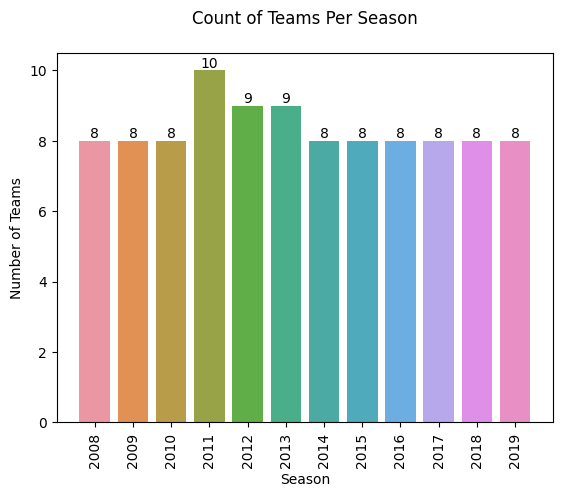

In [23]:
# Teams per seasons
team_per_season =df.groupby('season')['team1'].nunique().reset_index(name='team_count')
print(team_per_season)

# Plot the chart
ax=sns.barplot(data=team_per_season, x='season', y='team_count')
plt.xticks(rotation=90)
plt.title("Count of Teams Per Season\n")
plt.xlabel('Season')
plt.ylabel('Number of Teams')
ax.bar_label(ax.containers[0]);

plt.plot()

#### **How many matches were played in each season?**

    season  matches
0     2008       58
1     2009       57
2     2010       60
3     2011       73
4     2012       74
5     2013       76
6     2014       60
7     2015       59
8     2016       60
9     2017       59
10    2018       60
11    2019       60


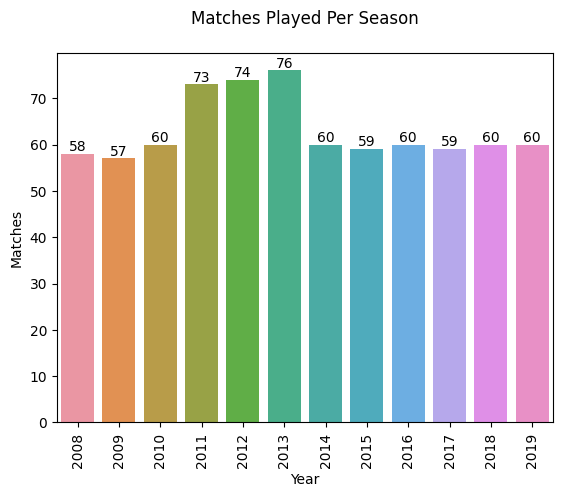

In [24]:
# Matches per season
match_per_seas = df.groupby('season')['season'].count().reset_index(name='matches')
print(match_per_seas)

# Plot the chart
ax= sns.barplot(data=match_per_seas, x='season', y='matches');
plt.title('Matches Played Per Season\n')
plt.xlabel('Year')
plt.xticks(rotation= 90);
plt.ylabel('Matches')
ax.bar_label(ax.containers[0]);

**Observations**

Although the total number of teams was 10 in 2011 and 9 in 2012, the corresponding match counts were 73 and 74, respectively. At first glance, this appears to be a data discrepancy, as one would expect the match count to decrease with fewer teams. However, further investigation reveals the underlying reason for this anomaly.

*When the IPL expanded to 10 teams, a new format was introduced featuring a total of 74 matches. This adjustment was necessary because retaining the previous format would have resulted in 94 matches, a significant increase from the 60 matches played in earlier seasons, where teams competed in a double round-robin format. Additionally, the knockout stage transitioned to a playoff format. To resolve any matches that end in a tie, a Super Over is played to determine the winner.* (Source: [Wikipedia](https://en.wikipedia.org/wiki/2011_Indian_Premier_League#:~:text=With%20the%20introduction%20of%202,a%20double%20round%2Drobin%20tournament.)))

#### **What are the most and least frequent venues for the matches?**

The most frequent venue for the matches is Eden Gardens Kolkata
The least frequent venue for the matches is OUTsurance Oval Bloemfontein


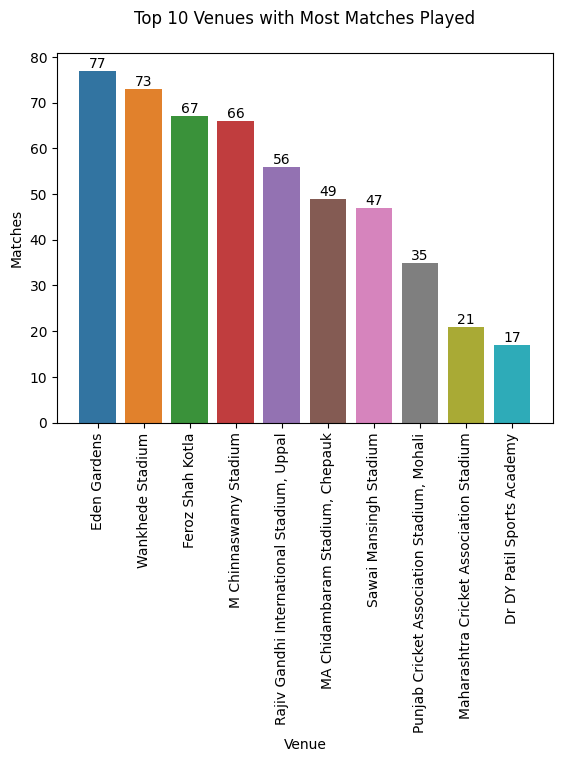

In [25]:
# Calcalate the frequency of each venue and pick the top 10 venues with the highest number of matches
freq_venue = df.groupby(['venue','city'])['venue'].count().sort_values(ascending=False).reset_index(name='matches')

top10_freq_venue = freq_venue.head(10)
top10_least_freq_venue = freq_venue.tail(10)

top_freq_venue= freq_venue.loc[freq_venue['matches'].idxmax()]
least_freq_venue = freq_venue.loc[freq_venue['matches'].idxmin()]


# Plot the chart for top 10 frequent venues and their match count
ax= sns.barplot(data=top10_freq_venue, x='venue', y='matches')
plt.title('Top 10 Venues with Most Matches Played\n')
plt.xlabel('Venue')
plt.xticks(rotation= 90);
plt.ylabel('Matches')
ax.bar_label(ax.containers[0]);
plt.plot()

print("The most frequent venue for the matches is", top_freq_venue['venue'], top_freq_venue['city'])
print("The least frequent venue for the matches is", least_freq_venue['venue'], least_freq_venue['city'])



[]

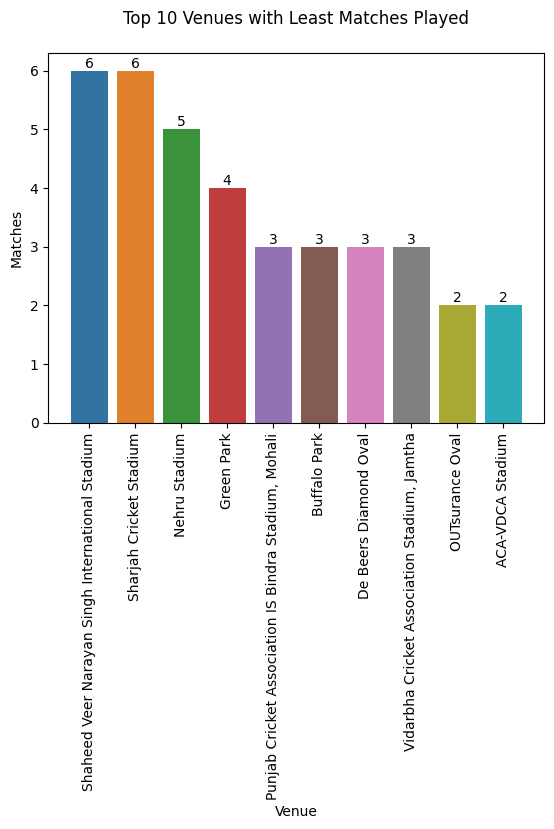

In [26]:
# Plot the chart for top 10 least frequent venues and their match count
ax1= sns.barplot(data=top10_least_freq_venue, x='venue', y='matches')
plt.title('Top 10 Venues with Least Matches Played\n')
plt.xlabel('Venue')
plt.xticks(rotation= 90);
plt.ylabel('Matches')
ax1.bar_label(ax1.containers[0]);
plt.plot()

#### **How many matches each city hosted?**

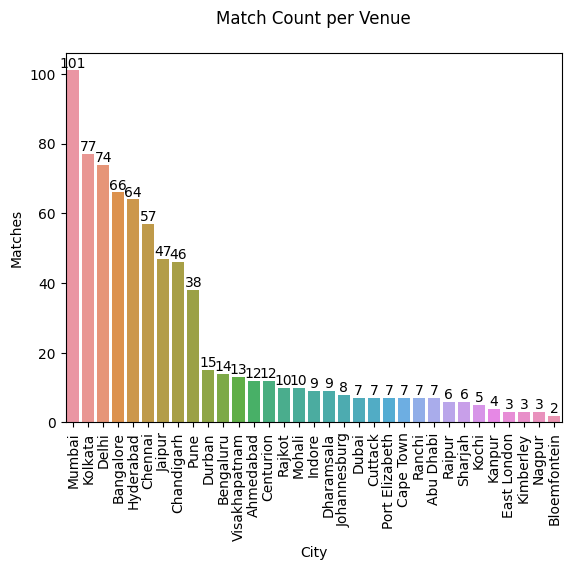

In [27]:
# Calcalate the frequency of each venue and pick the top 10 venues with the highest number of matches
freq_city = df.groupby(['city'])['city'].value_counts().sort_values(ascending=False)

ax= sns.barplot(x=freq_city.index, y=freq_city.values)
plt.title('Match Count per Venue\n')
plt.xlabel('City')
plt.ylabel('Matches')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

#### **What is the distribution of wins for each team? Which team has the most victories, and which team has the fewest?**

Team that has won most matches is Mumbai Indians (109 wins).
Team that has lost most matches is Rising Pune Supergiants (5 wins).


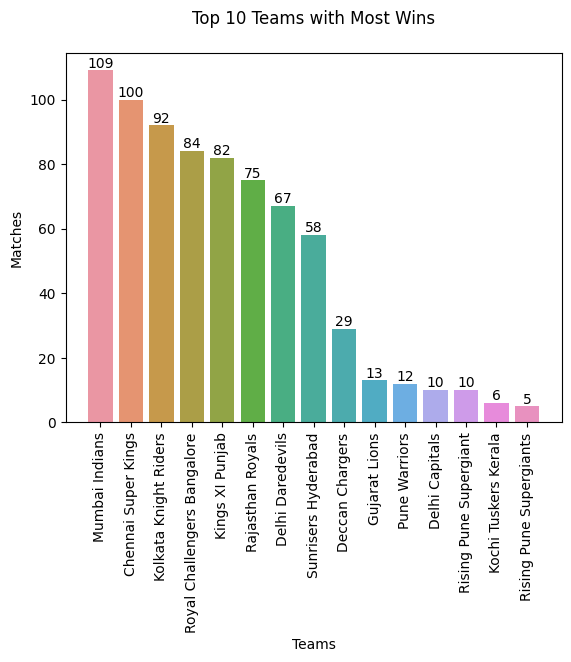

In [28]:
# Calculate matches won by each team (excluding where winner is 'None')
most_matches_win = df[df['winner']!='None'].groupby('winner')['winner'].value_counts().sort_values(ascending=False).reset_index(name='matches')

# Calculate top 10 winners
top10_winners = most_matches_win.head(20)

# find the top winners and top loser
most_wins = top10_winners.loc[top10_winners['matches'].idxmax()]
least_wins = top10_winners.loc[top10_winners['matches'].idxmin()]

#Print the result
print(f'Team that has won most matches is {most_wins["winner"]} ({most_wins["matches"]} wins).')
print(f'Team that has lost most matches is {least_wins["winner"]} ({least_wins["matches"]} wins).')

# Plot the chart for most wins
ax= sns.barplot(data = top10_winners, x= 'winner', y='matches')
plt.title('Top 10 Teams with Most Wins\n')
plt.xlabel('Teams')
plt.xticks(rotation= 90)
plt.ylabel('Matches')
ax.bar_label(ax.containers[0])
plt.plot();


**Observations**

The Mumbai Indians have the highest number of wins, with a total of 109, while the Rising Pune Supergiants have the fewest, with only 5 wins.

#### **What is the distribution of the toss decisions (batting/fielding)?**

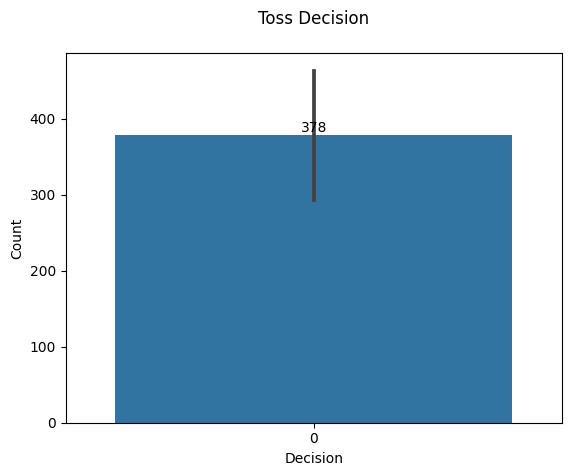

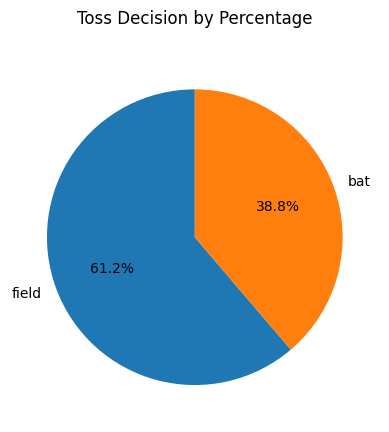

In [29]:
# Toss distribution
toss_dec = df['toss_decision'].value_counts()
ax= sns.barplot(data=toss_dec, orient='v')
plt.title('Toss Decision\n')
plt.xlabel('Decision')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()

# Pie chart
plt.title('Toss Decision by Percentage\n')
plt.pie(df['toss_decision'].value_counts(), labels=toss_dec.index, autopct='%1.1f%%', startangle=90);



**Observations**

Out of 756 toss wins, 463 (61.2%) resulted in the toss winner choosing to field first, while the remaining 293 (38.8%) opted to bat first.

#### **What is the distribution of the results of the matches (normal/tie/no result)?**

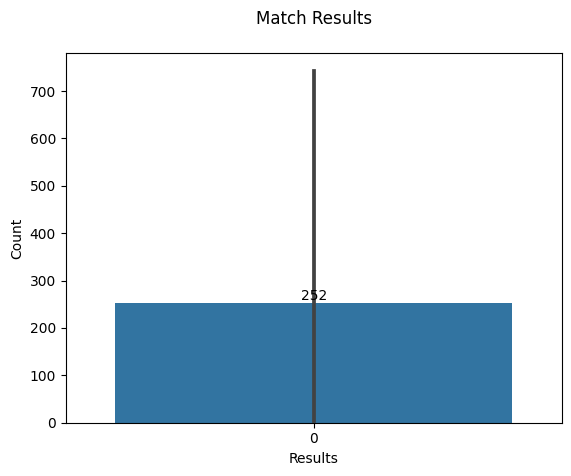

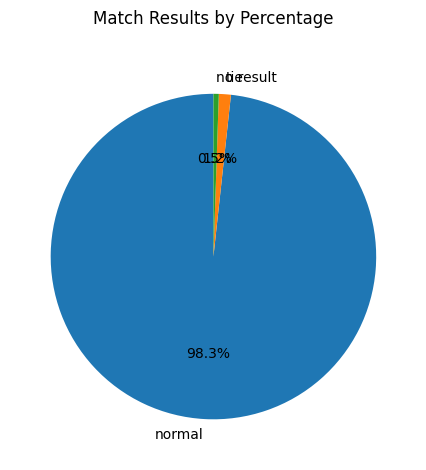

In [30]:
# Match results
match_result = df['result'].value_counts()
ax= sns.barplot(data=match_result, orient='v')
plt.title('Match Results\n')
plt.xlabel('Results')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()

# Pie chart
plt.title('Match Results by Percentage\n')
plt.pie(df['result'].value_counts(), labels=match_result.index, autopct='%1.1f%%', startangle=90);
plt.tight_layout()


**Observations**

Out of 756 matches, 743 (98.28%) concluded with normal results, 9 (1.19%) ended in a tie, and 4 (0.52%) had no result.

#### **Who were the most frequent player of the match awardees?**

In [31]:
# Most frequent player of the match
most_player_of_match= df['player_of_match'].value_counts().sort_values(ascending=False)
print("Most frequent player of the match is", most_player_of_match.idxmax())

Most frequent player of the match is CH Gayle


#### **Which umpire officiated the most matches?**

There are 76 umpires officiated the matches.

Umpire S Ravi officiated most matches (106).


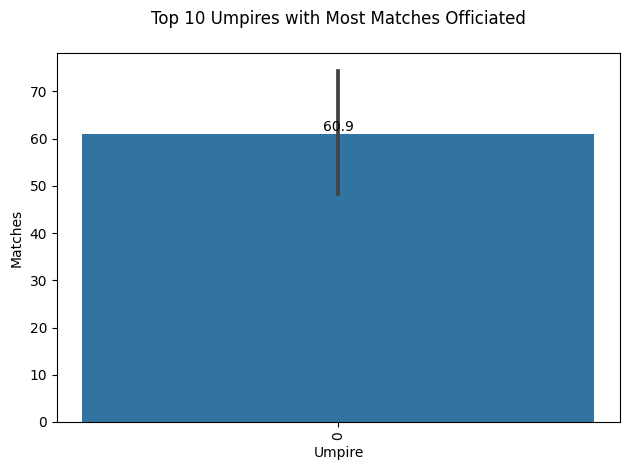

In [32]:
# Find the count of matches officiated by each umpire
all_umpire = pd.concat([df['umpire1'], df['umpire2']])
most_umpire = all_umpire.value_counts().sort_values(ascending=False).head(10)
least_umpire = all_umpire.value_counts().sort_values(ascending=True).head(10)


print(f'There are {all_umpire.nunique()} umpires officiated the matches.\n')
print(f'Umpire {most_umpire.idxmax()} officiated most matches ({most_umpire.max()}).')

# Plot the chart to show matches officiated by each Top 10 umpire
ax=sns.barplot(data=most_umpire);
plt.title("Top 10 Umpires with Most Matches Officiated\n")
plt.xticks(rotation=90)
plt.xlabel("Umpire")
plt.ylabel("Matches")
plt.tight_layout()
ax.bar_label(ax.containers[0])
plt.plot();



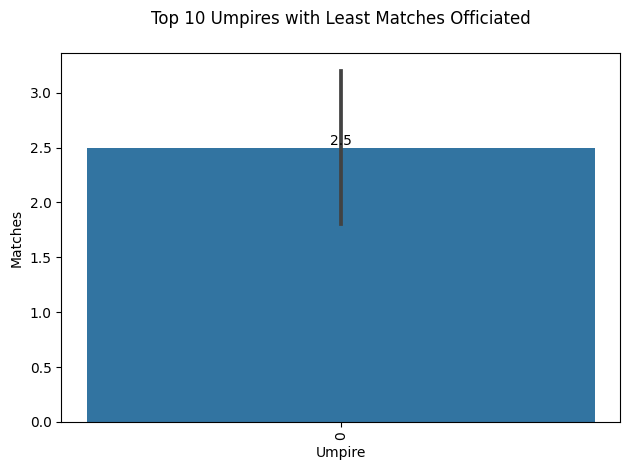

In [33]:
# Plot the chart to show matches officiated by each Bottom 10 umpire
ax=sns.barplot(data=least_umpire);
plt.title("Top 10 Umpires with Least Matches Officiated\n")
plt.xticks(rotation=90)
plt.xlabel("Umpire")
plt.ylabel("Matches")
plt.tight_layout()
ax.bar_label(ax.containers[0])
plt.plot();

**Observations**

- CH Gayle is the most frequent player of the match. 
- A total of 76 umpires officiated the matches.
- Umpire S. Ravi officiated the most matches, with 106, while Nand Kishore, Sundaram Ravi, and Subroto Das each officiated the fewest, with just 1 match.

#### **What is the distribution of the win by runs margin?**

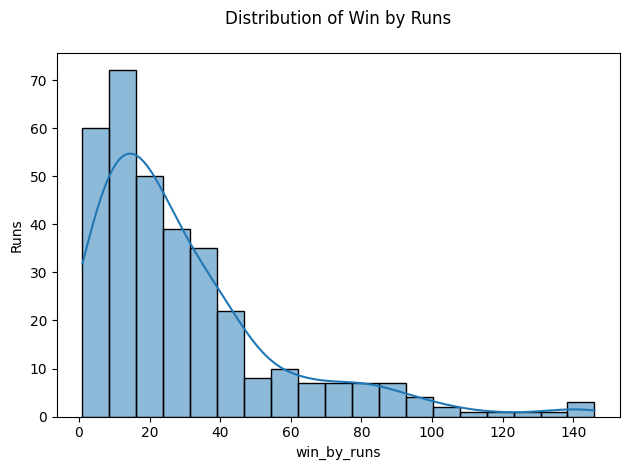

In [34]:
# Distribution of win by run (histogram)
ax= sns.histplot(data=df['win_by_runs'], kde=True)
plt.title('Distribution of Win by Runs\n')
plt.ylabel ('Runs')
ax.bar_label(ax.containers[0]);
plt.tight_layout()
plt.plot();

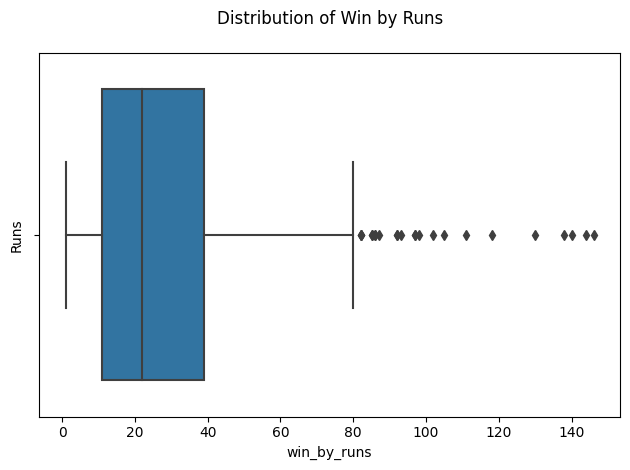

In [35]:
# Distribution of win by run (boxplot)
sns.boxplot(data=df, x='win_by_runs')
plt.title('Distribution of Win by Runs\n')
plt.ylabel ('Runs')
plt.tight_layout()
plt.plot();

#### **What is the distribution of the win by wickets margin?**

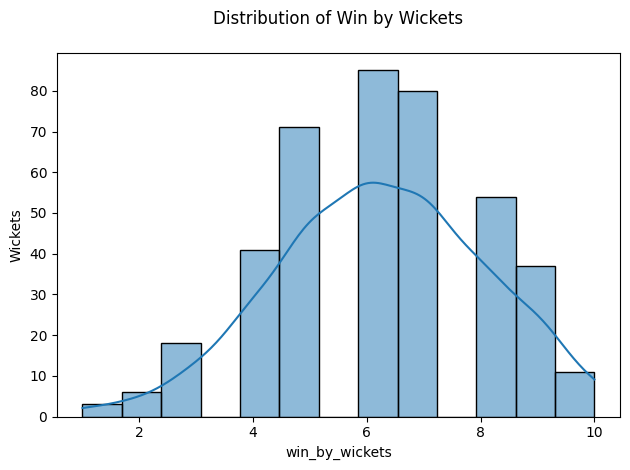

In [36]:
# Distribution of win by wickets
ax= sns.histplot(data=df['win_by_wickets'], kde=True)

plt.title('Distribution of Win by Wickets\n')
plt.ylabel ('Wickets')
ax.bar_label(ax.containers[0]);
plt.tight_layout()
plt.plot();

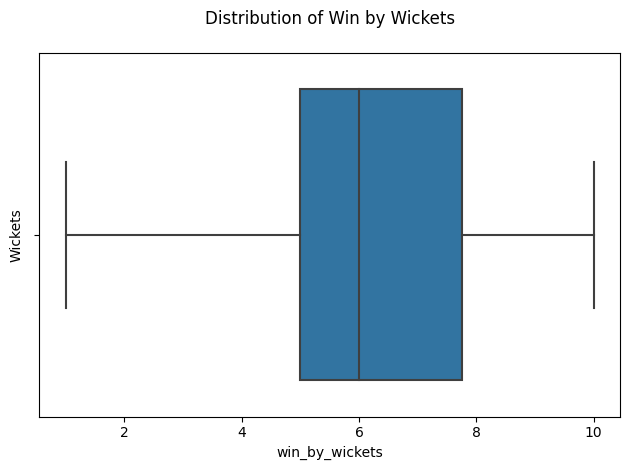

In [37]:
# Distribution of win by wickets (boxplot)
sns.boxplot(data=df, x='win_by_wickets')
plt.title('Distribution of Win by Wickets\n')
plt.ylabel ('Wickets')
plt.tight_layout()
plt.plot();

**How does the distribution of win by runs vary across different seasons?**

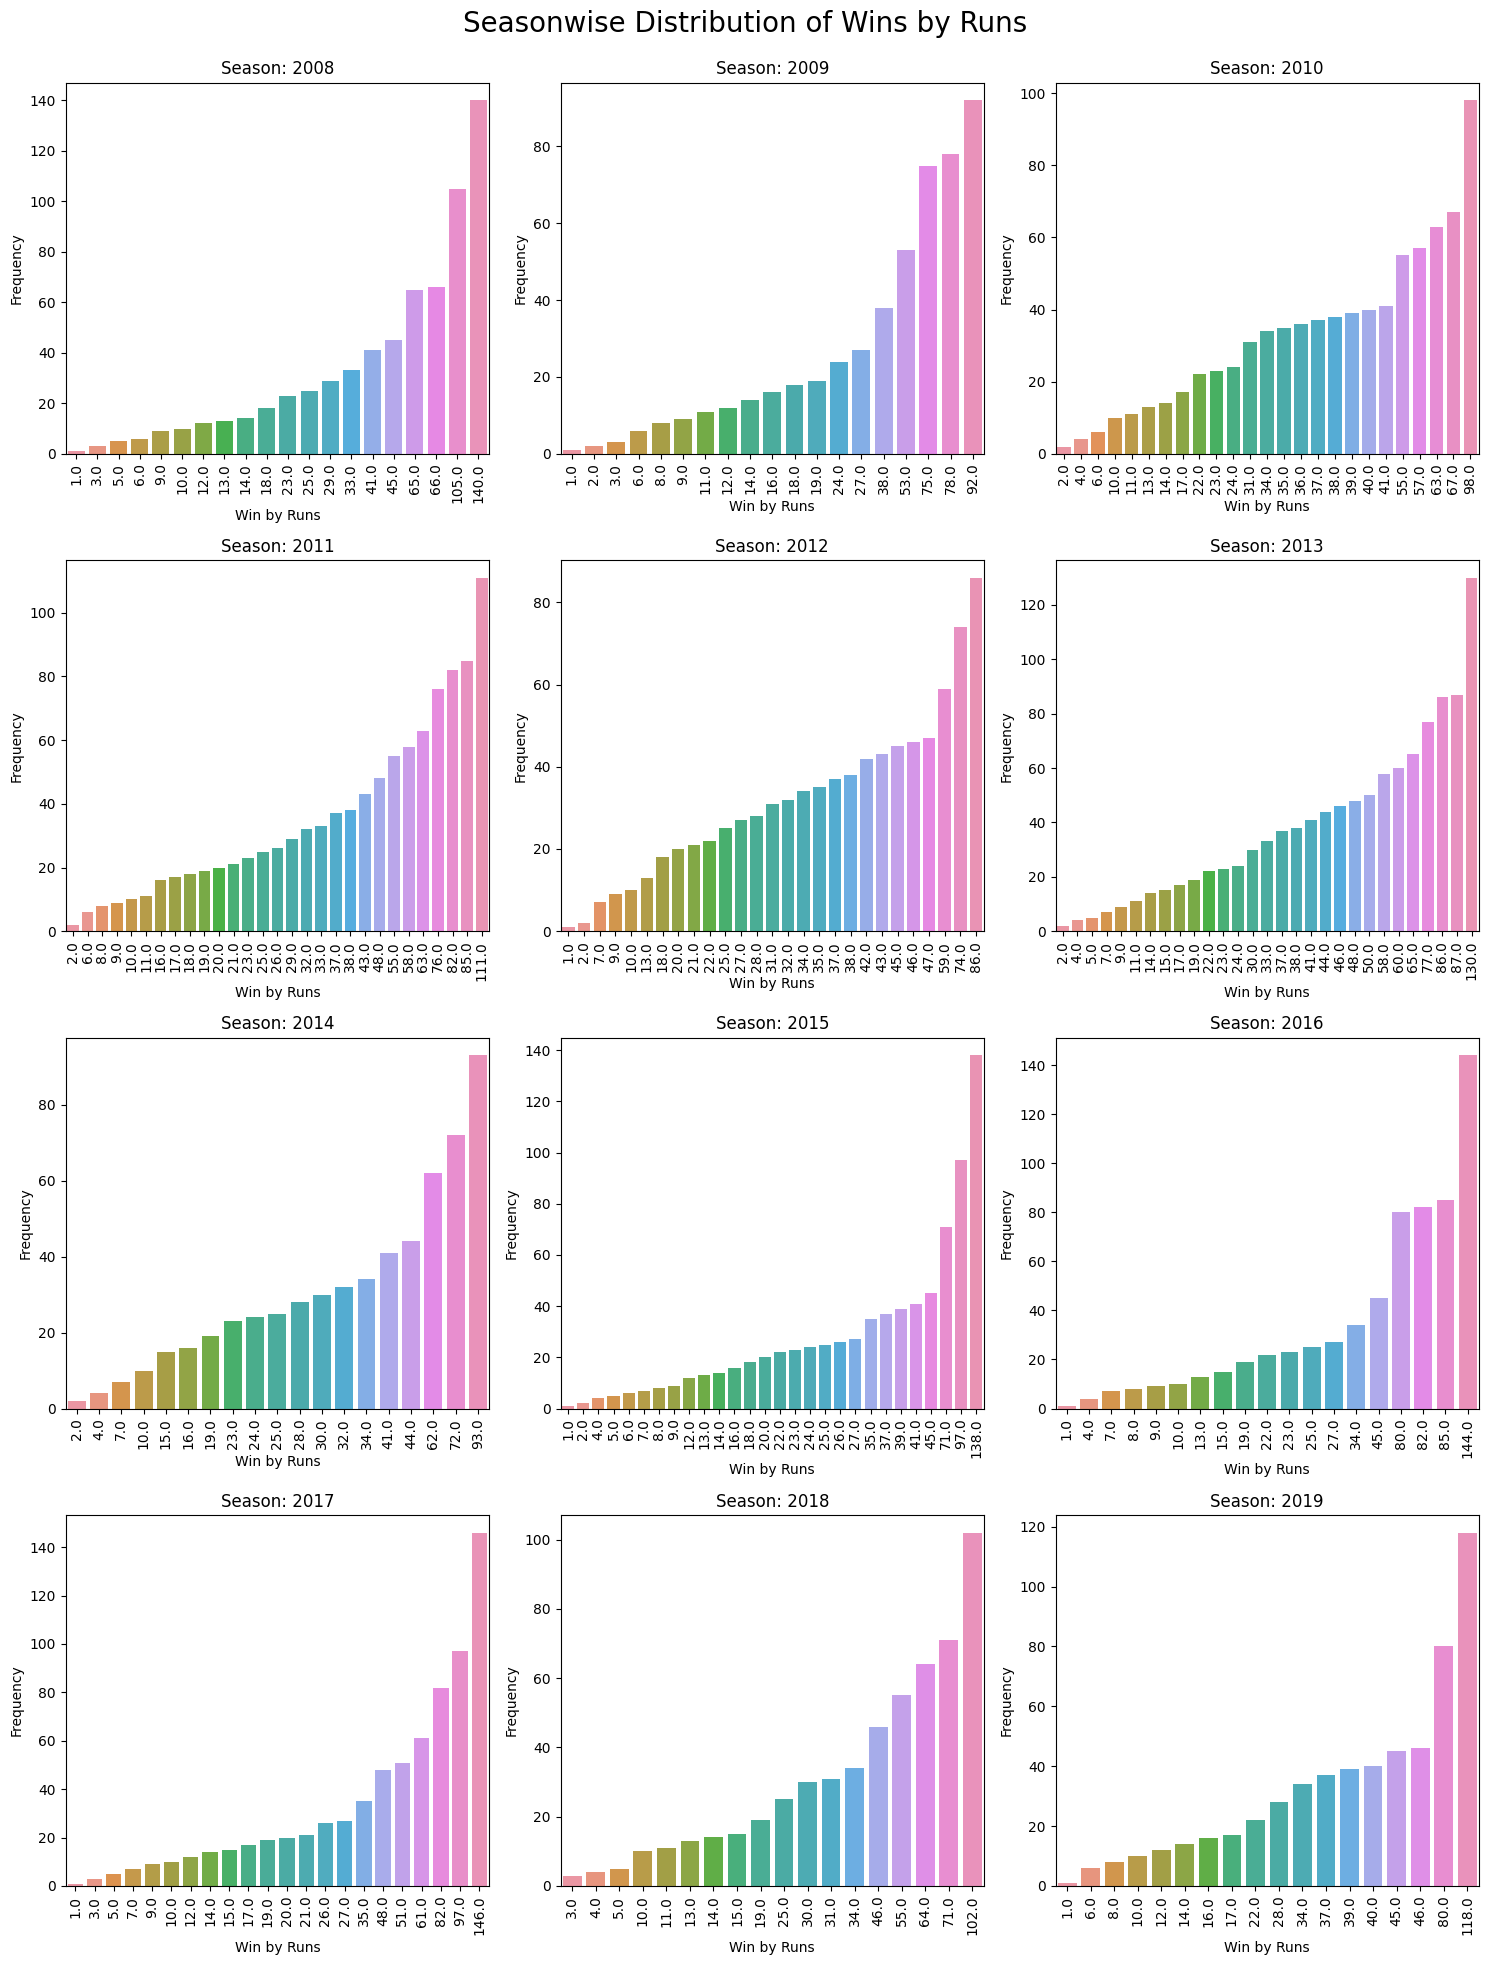

In [38]:
# Calcaulte distribution of win_by_runs across seasons
win_runs_seasons = df.groupby('season')['win_by_runs'].value_counts().reset_index()

# Get the unique seasons and calculate number of columns/rows required to plot
unique_seasons = win_runs_seasons['season'].unique()
num_seasons = len(unique_seasons)
num_cols = 3  
num_rows = (num_seasons + num_cols - 1) // num_cols  

# Set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5)) 
fig.suptitle("Seasonwise Distribution of Wins by Runs\n", fontsize=20)
# Create subplots for each season
for i, season in enumerate(unique_seasons):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    season_data = win_runs_seasons[win_runs_seasons['season'] == season]
    sns.barplot(x='win_by_runs', y='win_by_runs', data=season_data, ax=ax)
    
    ax.set_title(f"Season: {season}")
    ax.set_xlabel("Win by Runs")
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=90) 

# Show the plots
plt.tight_layout()

plt.show()



#### **How does the distribution of win by wickets vary across different seasons?**

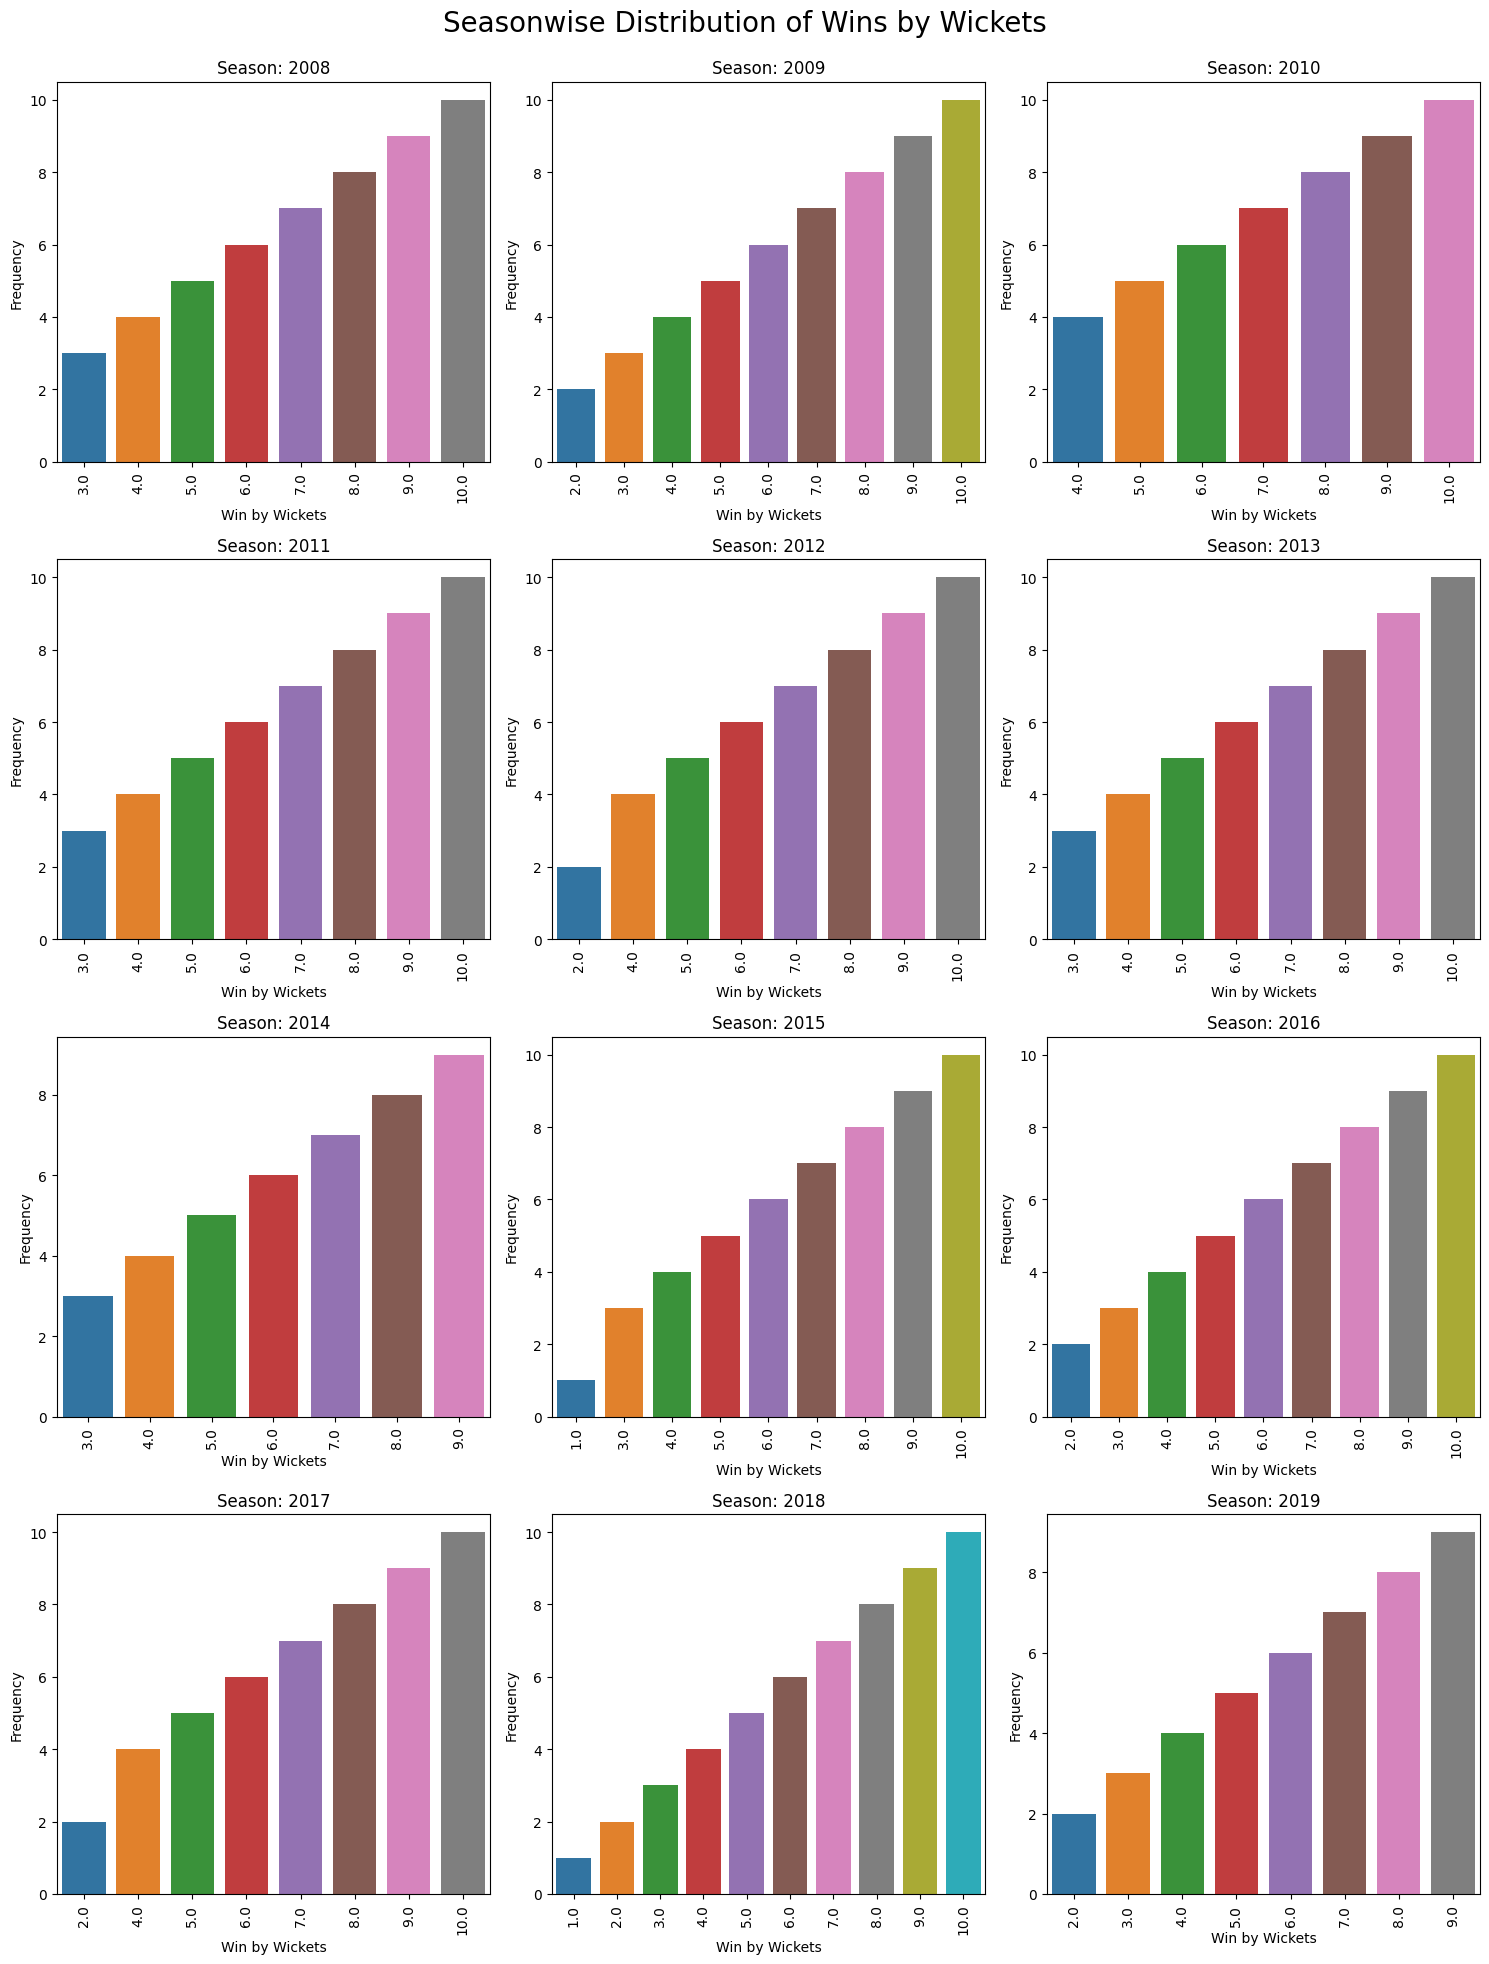

In [39]:
# Distribute of win by wickets across seasons
win_wicket_seasons = df.groupby('season')['win_by_wickets'].value_counts().reset_index()

# Get the unique seasons from the dataframe and calculate number of columns/rows required to plot
unique_seasons = win_wicket_seasons['season'].unique()
num_seasons = len(unique_seasons)
num_cols = 3  
num_rows = (num_seasons + num_cols - 1) // num_cols  

# Set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5)) 
fig.suptitle("Seasonwise Distribution of Wins by Wickets\n", fontsize=20)

# Create subplots
for i, season in enumerate(unique_seasons):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    season_data = win_wicket_seasons[win_wicket_seasons['season'] == season]
    sns.barplot(x='win_by_wickets', y='win_by_wickets', data=season_data, ax=ax)
    
    ax.set_title(f"Season: {season}")
    ax.set_xlabel("Win by Wickets")
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=90) 

# Show the plot
plt.tight_layout()
plt.show()

#### **Do certain venues have a significant impact on the win by runs margin?**

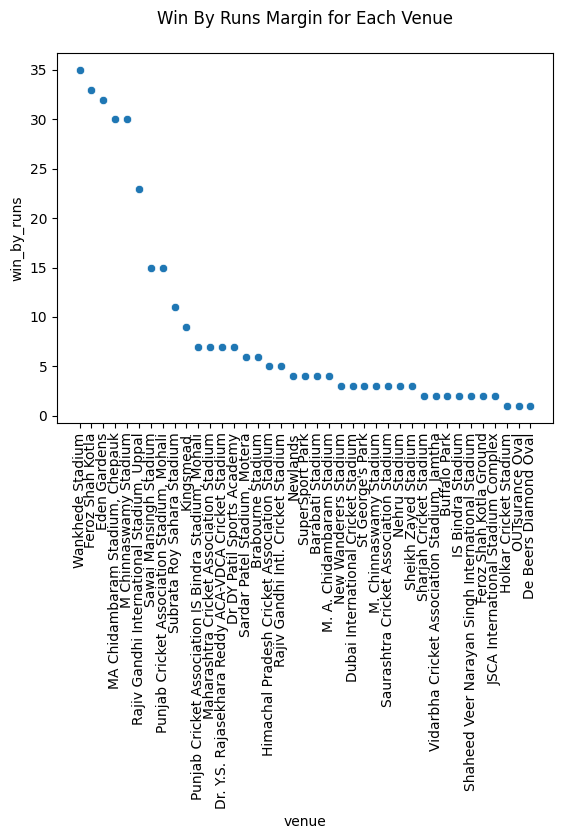

In [40]:
# Create box plots of win_by_runs for different venues. Look for venues with unusually high or low median win_by_runs.

# Filter wins with difference = 0
win_by_runs_mask = df['win_by_runs'] > 0

# Group by venue and count
win_runs_venue = df[win_by_runs_mask].groupby('venue')['win_by_runs'].count().reset_index().sort_values(by='win_by_runs', ascending=False)

# Create scatterplot for win_by_runs
sns.scatterplot(data=win_runs_venue, x='venue', y='win_by_runs')
plt.xticks(rotation=90)
plt.title('Win By Runs Margin for Each Venue\n')
plt.show()


**Observations**

Top 10 venues with highest margin of win by runs along with their win margins are *Wankhede Stadium* (35), *Feroz Shah Kotla* (33), *Eden Gardens* (32), *MA Chidambaram Stadium, Chepauk* (30), *M Chinnaswamy Stadium* (30), *Rajiv Gandhi International Stadium, Uppal* (23), *Sawai Mansingh Stadium* (15), *Punjab Cricket Association Stadium, Mohali* (15), *Subrata Roy Sahara Stadium* (11) and *Kingsmead* (9).

#### **What is the distribution of matches across different seasons, days, months, and years? Are there more matches in certain periods?**

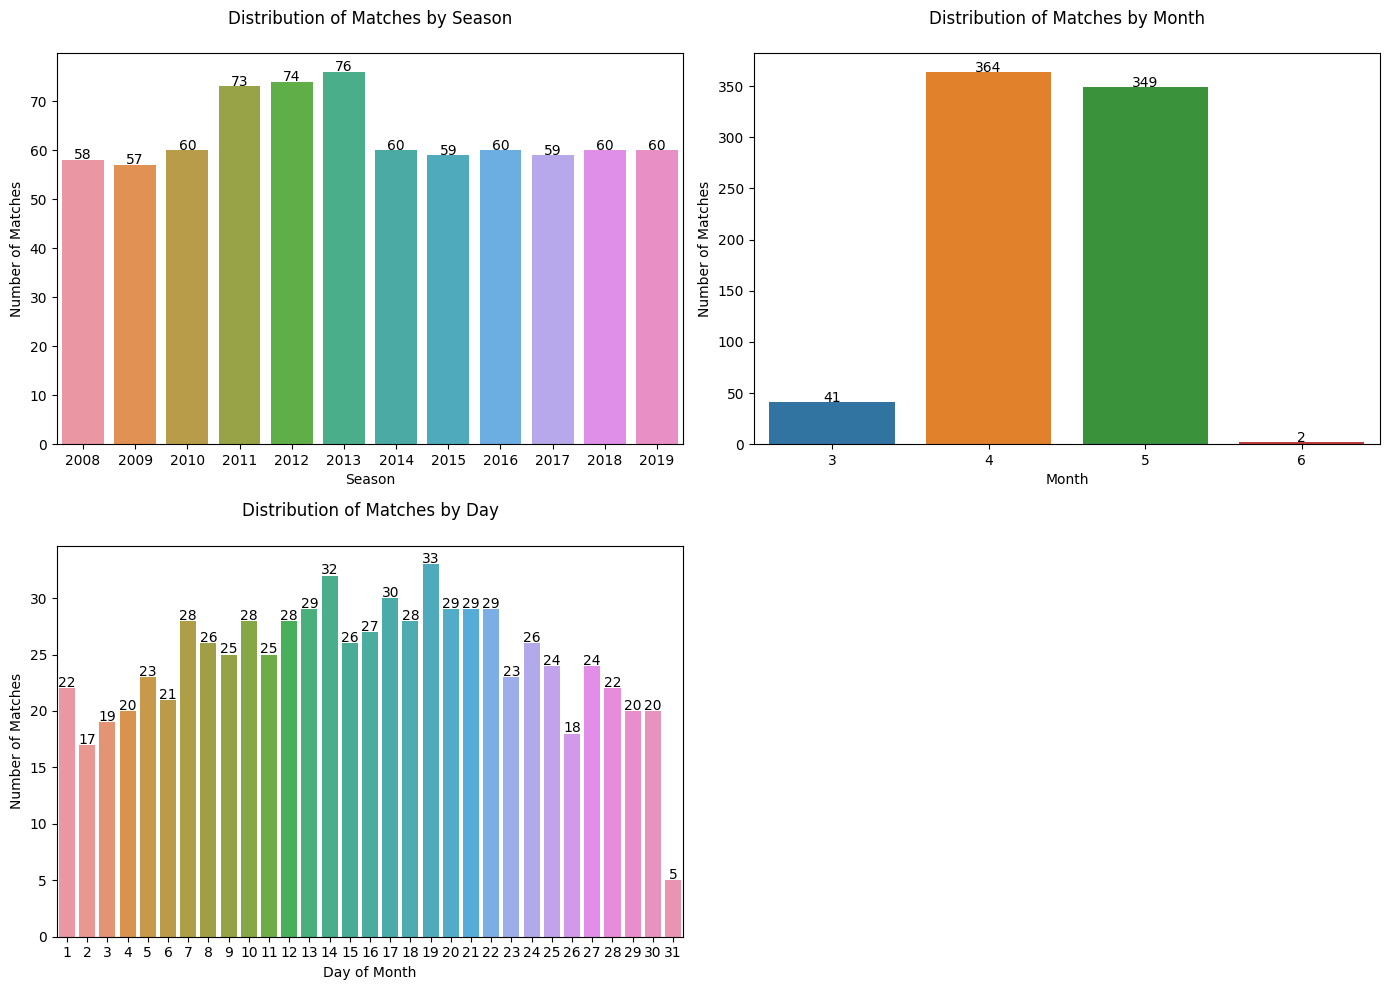

In [41]:
# Calculate distributions
season_counts = df['season'].value_counts().sort_index()
month_counts = df['month'].value_counts().sort_index()
day_counts = df['day'].value_counts().sort_index()
year_counts = df['year'].value_counts().sort_index()

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Seasons
sns.barplot(x=season_counts.index, y=season_counts.values, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Matches by Season\n')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Number of Matches')

# Add labels to bars
for i in range(len(season_counts)):
    axes[0, 0].text(i, season_counts.values[i] + 0.1, season_counts.values[i], ha='center')

# Add labels to all bars 
ax.bar_label(ax.containers[0]);

# Months
sns.barplot(x=month_counts.index, y=month_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Matches by Month\n')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Matches')

# Add labels to bars
for i in range(len(month_counts)):
    axes[0, 1].text(i, month_counts.values[i] + 0.1, month_counts.values[i], ha='center')

# Days
sns.barplot(x=day_counts.index, y=day_counts.values, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Matches by Day\n')
axes[1, 0].set_xlabel('Day of Month')
axes[1, 0].set_ylabel('Number of Matches')

# Add labels to bars
for i in range(len(day_counts)):
    axes[1, 0].text(i, day_counts.values[i] + 0.1, day_counts.values[i], ha='center')


# No need for a fourth plot, so we can hide the unused subplot
fig.delaxes(axes[1, 1])  # Remove the empty subplot

plt.tight_layout()
plt.show()

**Observations**

- The majority of matches were played in April (364 matches) and May (349 matches).
- In the 2013 season, the highest number of matches was recorded, with a total of 76. This was followed closely by the 2012 season with 74 matches and the 2011 season with 73 matches.


#### **Are there any noticeable trends in the day or month feature across the dataset? (e.g., Are more matches held on weekends?)**

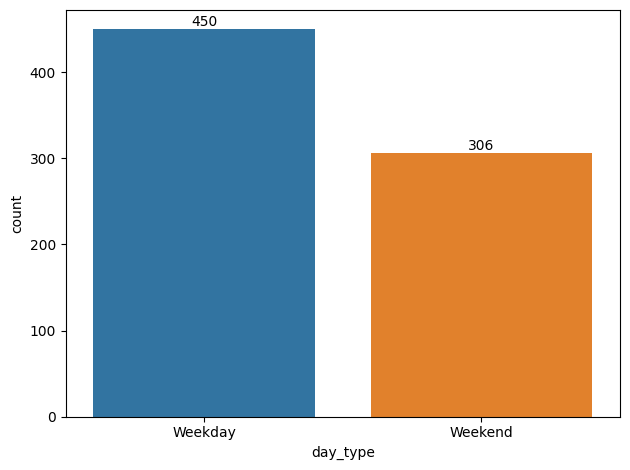

In [42]:
# Count of matches per day_type
ax=sns.countplot(data=df, x = 'day_type');
plt.tight_layout()
ax.bar_label(ax.containers[0]);
plt.show()

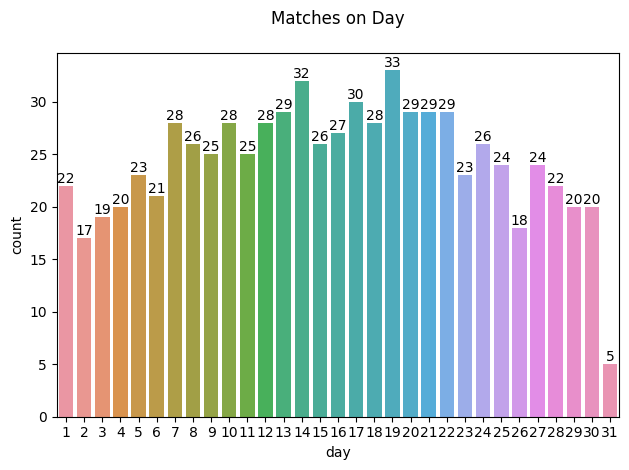

In [43]:
# Count of matches per day_type
ax=sns.countplot(data=df, x = 'day');
ax.bar_label(ax.containers[0])
plt.title('Matches on Day\n')
plt.tight_layout()

plt.show()

**Observations**

While more matches have been played on weekdays than on weekends, there is no definitive evidence to suggest that any particular day is more favorable for matches.

#### **How does the distribution of the win_by_runs vary across different seasons?**

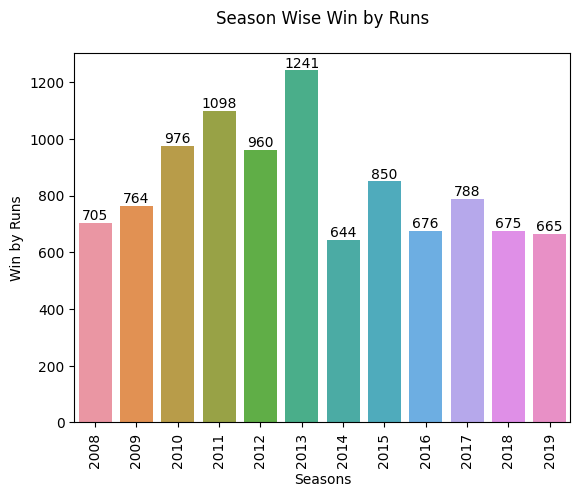

In [44]:
# Group win by runs per season
win_by_runs_dist = df.groupby('season')['win_by_runs'].sum().reset_index()

# Plot the chart
ax=sns.barplot(data=win_by_runs_dist, x='season', y='win_by_runs');

plt.title('Season Wise Win by Runs\n')
plt.xlabel("Seasons")
plt.ylabel("Win by Runs")
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=90)

#### **How does the distribution of the win_by_wickets vary across different seasons?**

    season  win_by_wickets
0     2008          221.00
1     2009          180.00
2     2010          190.00
3     2011          265.00
4     2012          241.00
5     2013          227.00
6     2014          225.00
7     2015          148.00
8     2016          244.00
9     2017          204.00
10    2018          186.00
11    2019          202.00


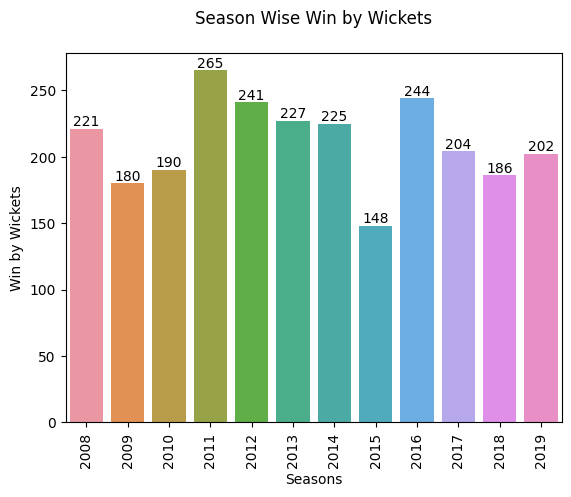

In [45]:
# Group win by wickets per season
win_by_wickets_dist = df.groupby('season')['win_by_wickets'].sum().reset_index()
print(win_by_wickets_dist)

# Plot the chart
ax=sns.barplot(data=win_by_wickets_dist, x='season', y='win_by_wickets');

plt.title('Season Wise Win by Wickets\n')
plt.xlabel("Seasons")
plt.ylabel("Win by Wickets")
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=90)

#### **How frequently is the D/L (Duckworth-Lewis) method applied across matches?**

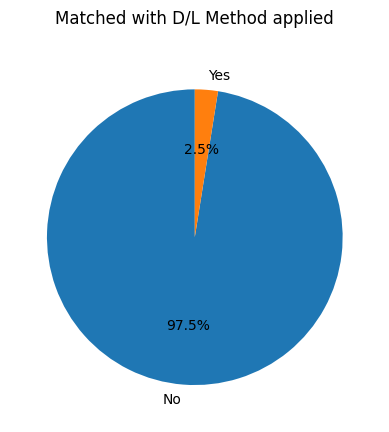

In [46]:
# Count of matches D/L method is applied
dl_used = df['dl_applied'].value_counts()
labels = ['No' if i == 0 else 'Yes' for i in dl_used.index]

dl_freq= dl_used/df.shape[0]

# Plot the chart
plt.title('Matched with D/L Method applied\n')
plt.pie(df['dl_applied'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90);

**Observations**

D/L (Duckworth-Lewis) method was used for only 19 matches (3% of all the matches).

#### **What is the distribution of win by runs and win by wickets? How often do teams win by runs compared to winning by wickets?**

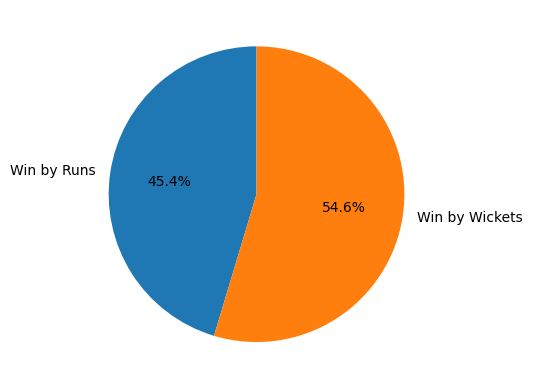

In [47]:
# Distribution of win by runs and win by wicket
win_run = (df['win_by_runs']).count()
win_wick = (df['win_by_wickets']).count()

labels = ['Win by Runs', 'Win by Wickets']
sizes = [win_run, win_wick]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90);

**Observations**

More matches were won by wickets (54.6%) compared to by runs (45.4%). This indicates that teams who batted second won the maximum number of matches.

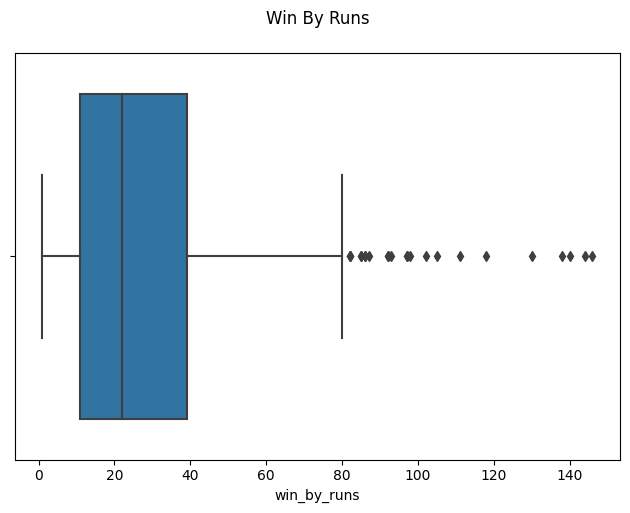

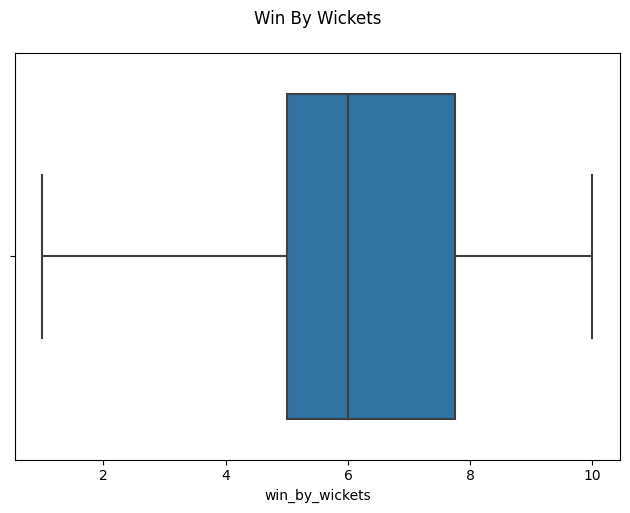

In [48]:
# Win by runs
sns.boxplot(data = df, x='win_by_runs')
plt.tight_layout()
plt.title('Win By Runs\n')
plt.show()

# Win by wicket
sns.boxplot(data = df, x='win_by_wickets')
plt.tight_layout()
plt.title('Win By Wickets\n')
plt.show()

#### **Are there certain venues where teams consistently win or lose? Does the city or venue have an impact on match results?**

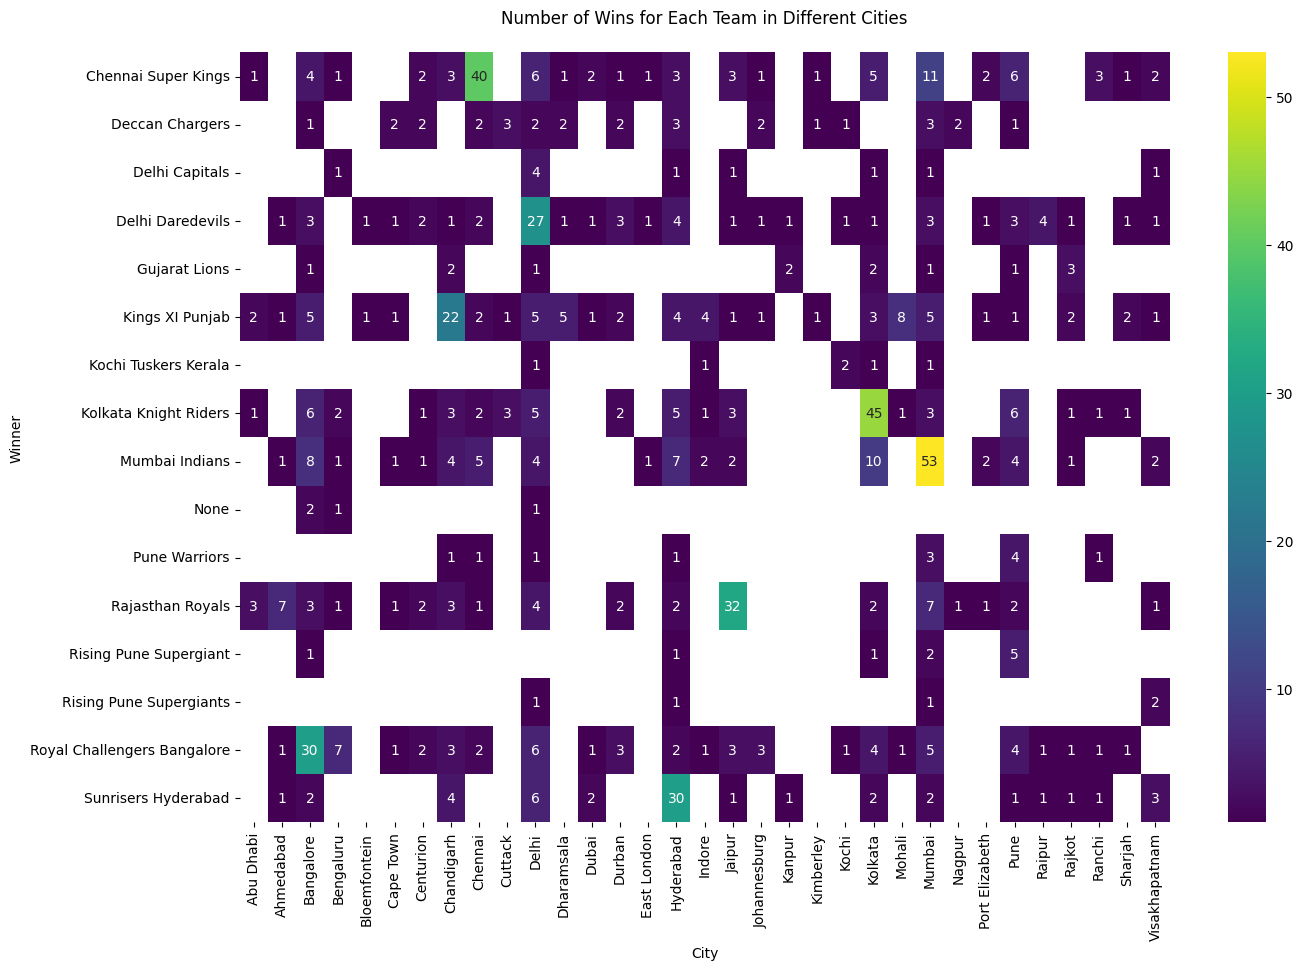

In [49]:
# Relationship between winning team and city
team_city_wins = df.groupby(['winner', 'city'])['id'].count().unstack()
plt.figure(figsize=(15, 10))
sns.heatmap(team_city_wins, annot=True, cmap='viridis', fmt='g')
plt.title('Number of Wins for Each Team in Different Cities\n')
plt.xlabel('City')
plt.ylabel('Winner')
plt.show()

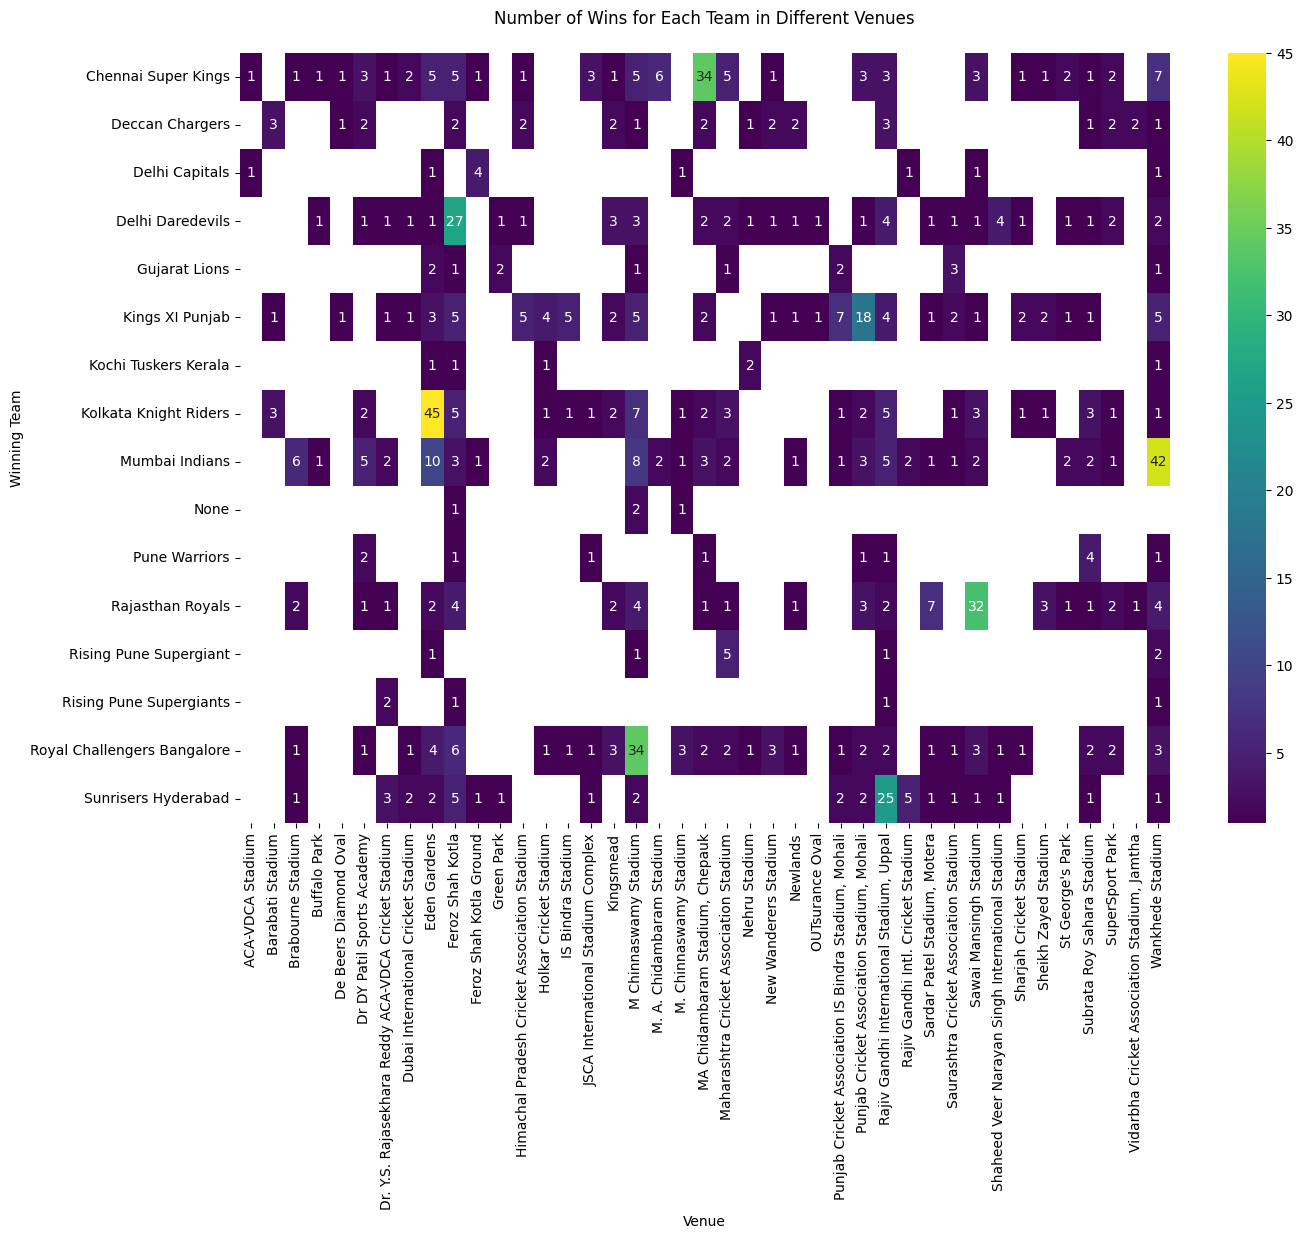

In [50]:
# Relationship between winning team and venue
team_venue_wins = df.groupby(['winner', 'venue'])['id'].count().unstack()
plt.figure(figsize=(15, 10))
sns.heatmap(team_venue_wins, annot=True, cmap='viridis', fmt='g')
plt.title('Number of Wins for Each Team in Different Venues\n')
plt.xlabel('Venue')
plt.ylabel('Winning Team')
plt.show()

**Observations**

There is clear evidence that a team's home city significantly contributes to its success. Several teams, notably *Sunrisers Hyderabad*, *Rajasthan Royals*, *Mumbai Indians*, *Kolkata Knight Riders*, *Kings XI Punjab*, *Delhi Daredevils*, and *Chennai Super Kings*, have recorded a significant and highest number of victories in their home city.

#### **How do match results vary by *season*, *month*, or *year*? (e.g., is there a higher winning percentage for teams in specific seasons?) Are certain teams more successful in specific years or during specific seasons?**

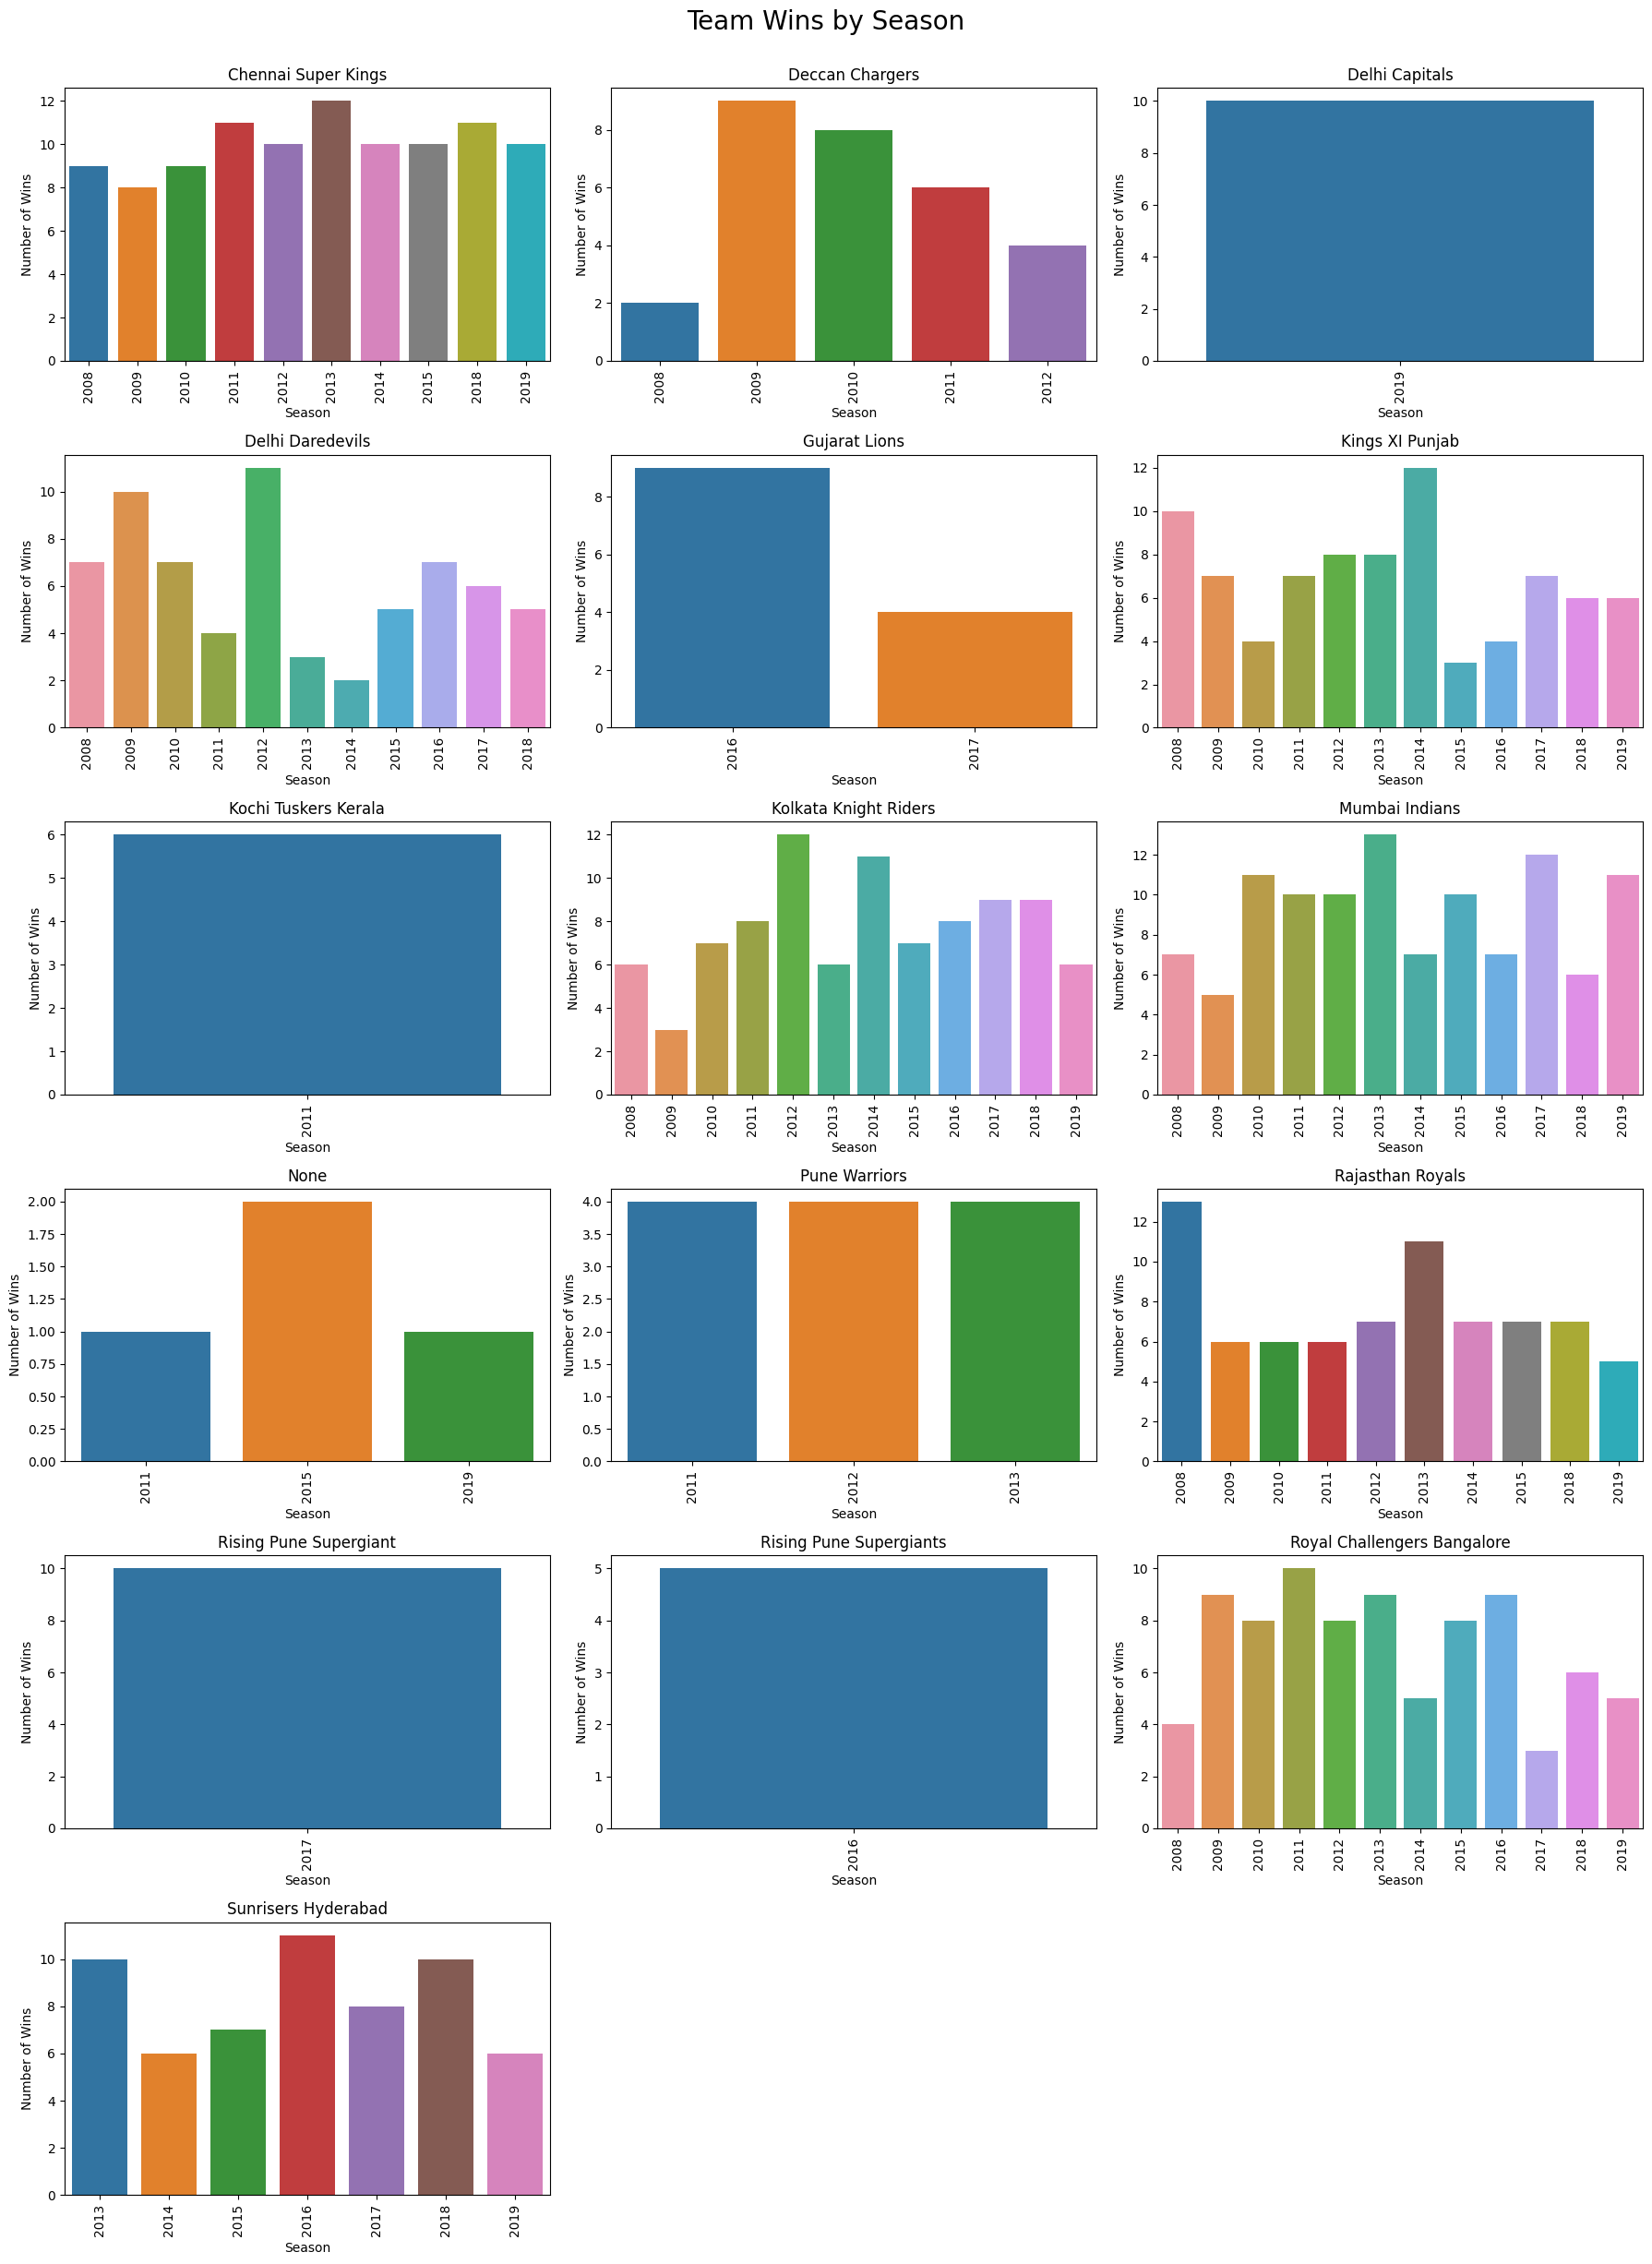

In [51]:
# Count of team wins by season
team_wins_by_seasons  = df.groupby(['winner', 'season'])['id'].count().reset_index(name='wins')


# Get a list of unique teams
teams = team_wins_by_seasons['winner'].unique()

# Set the number of rows and columns for the subplots
num_teams = len(teams)
num_cols = 3  # Set the number of columns for the subplot grid
num_rows = (num_teams + num_cols - 1) // num_cols  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten() 

# Loop through each team and create a subplot
for i, team in enumerate(teams):
    team_data = team_wins_by_seasons[team_wins_by_seasons['winner'] == team]
    sns.barplot(data=team_data, x='season', y='wins', ax=axes[i])
    axes[i].set_title(team)
    axes[i].set_xlabel('Season')
    axes[i].set_ylabel('Number of Wins')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-tick labels for better readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Team Wins by Season\n', fontsize=20, y=1.02)
plt.show()


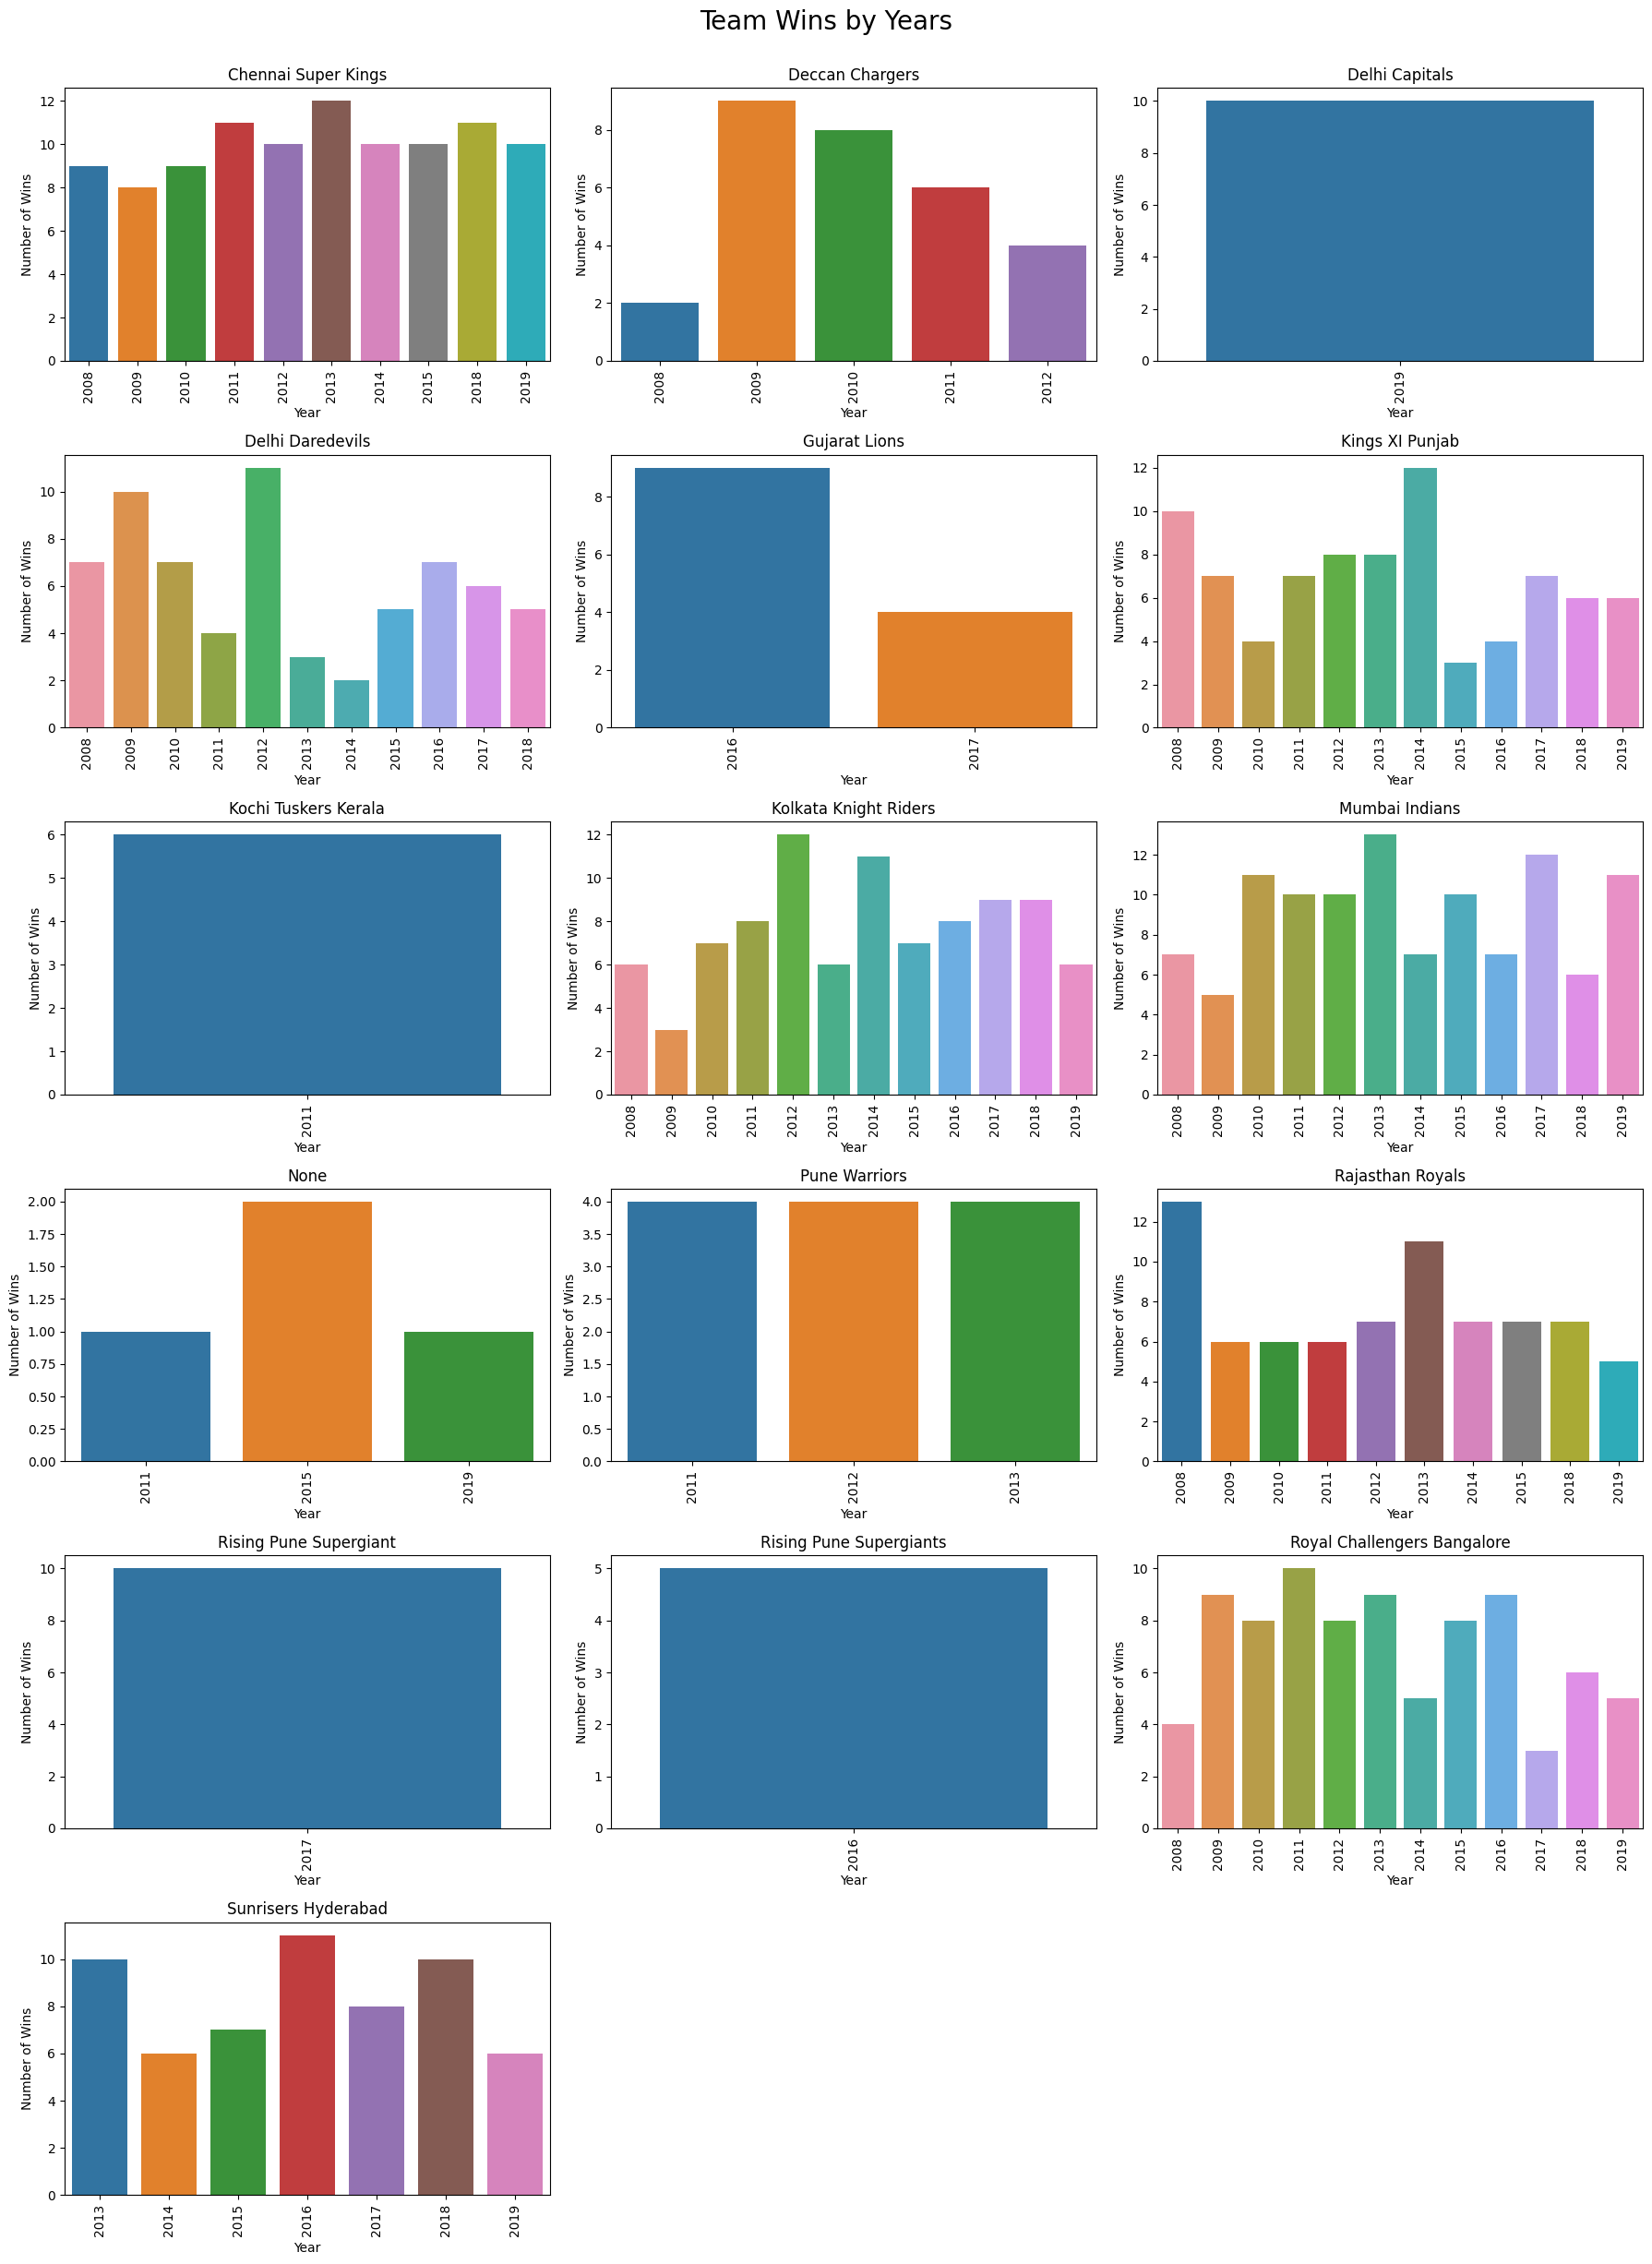

In [52]:
# Count of team wins by year
team_wins_by_year  = df.groupby(['winner', 'year'])['id'].count().reset_index(name='wins')

# Get a list of unique teams
teams = team_wins_by_year['winner'].unique()

# Set the number of rows and columns for the subplots
num_teams = len(teams)
num_cols = 3  # Set the number of columns for the subplot grid
num_rows = (num_teams + num_cols - 1) // num_cols  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten() 

# Loop through each team and create a subplot
for i, team in enumerate(teams):
    team_data = team_wins_by_year[team_wins_by_year['winner'] == team]
    sns.barplot(data=team_data, x='year', y='wins', ax=axes[i])
    axes[i].set_title(team)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Wins')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-tick labels for better readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Team Wins by Years\n', fontsize=20, y=1.02)
plt.show()


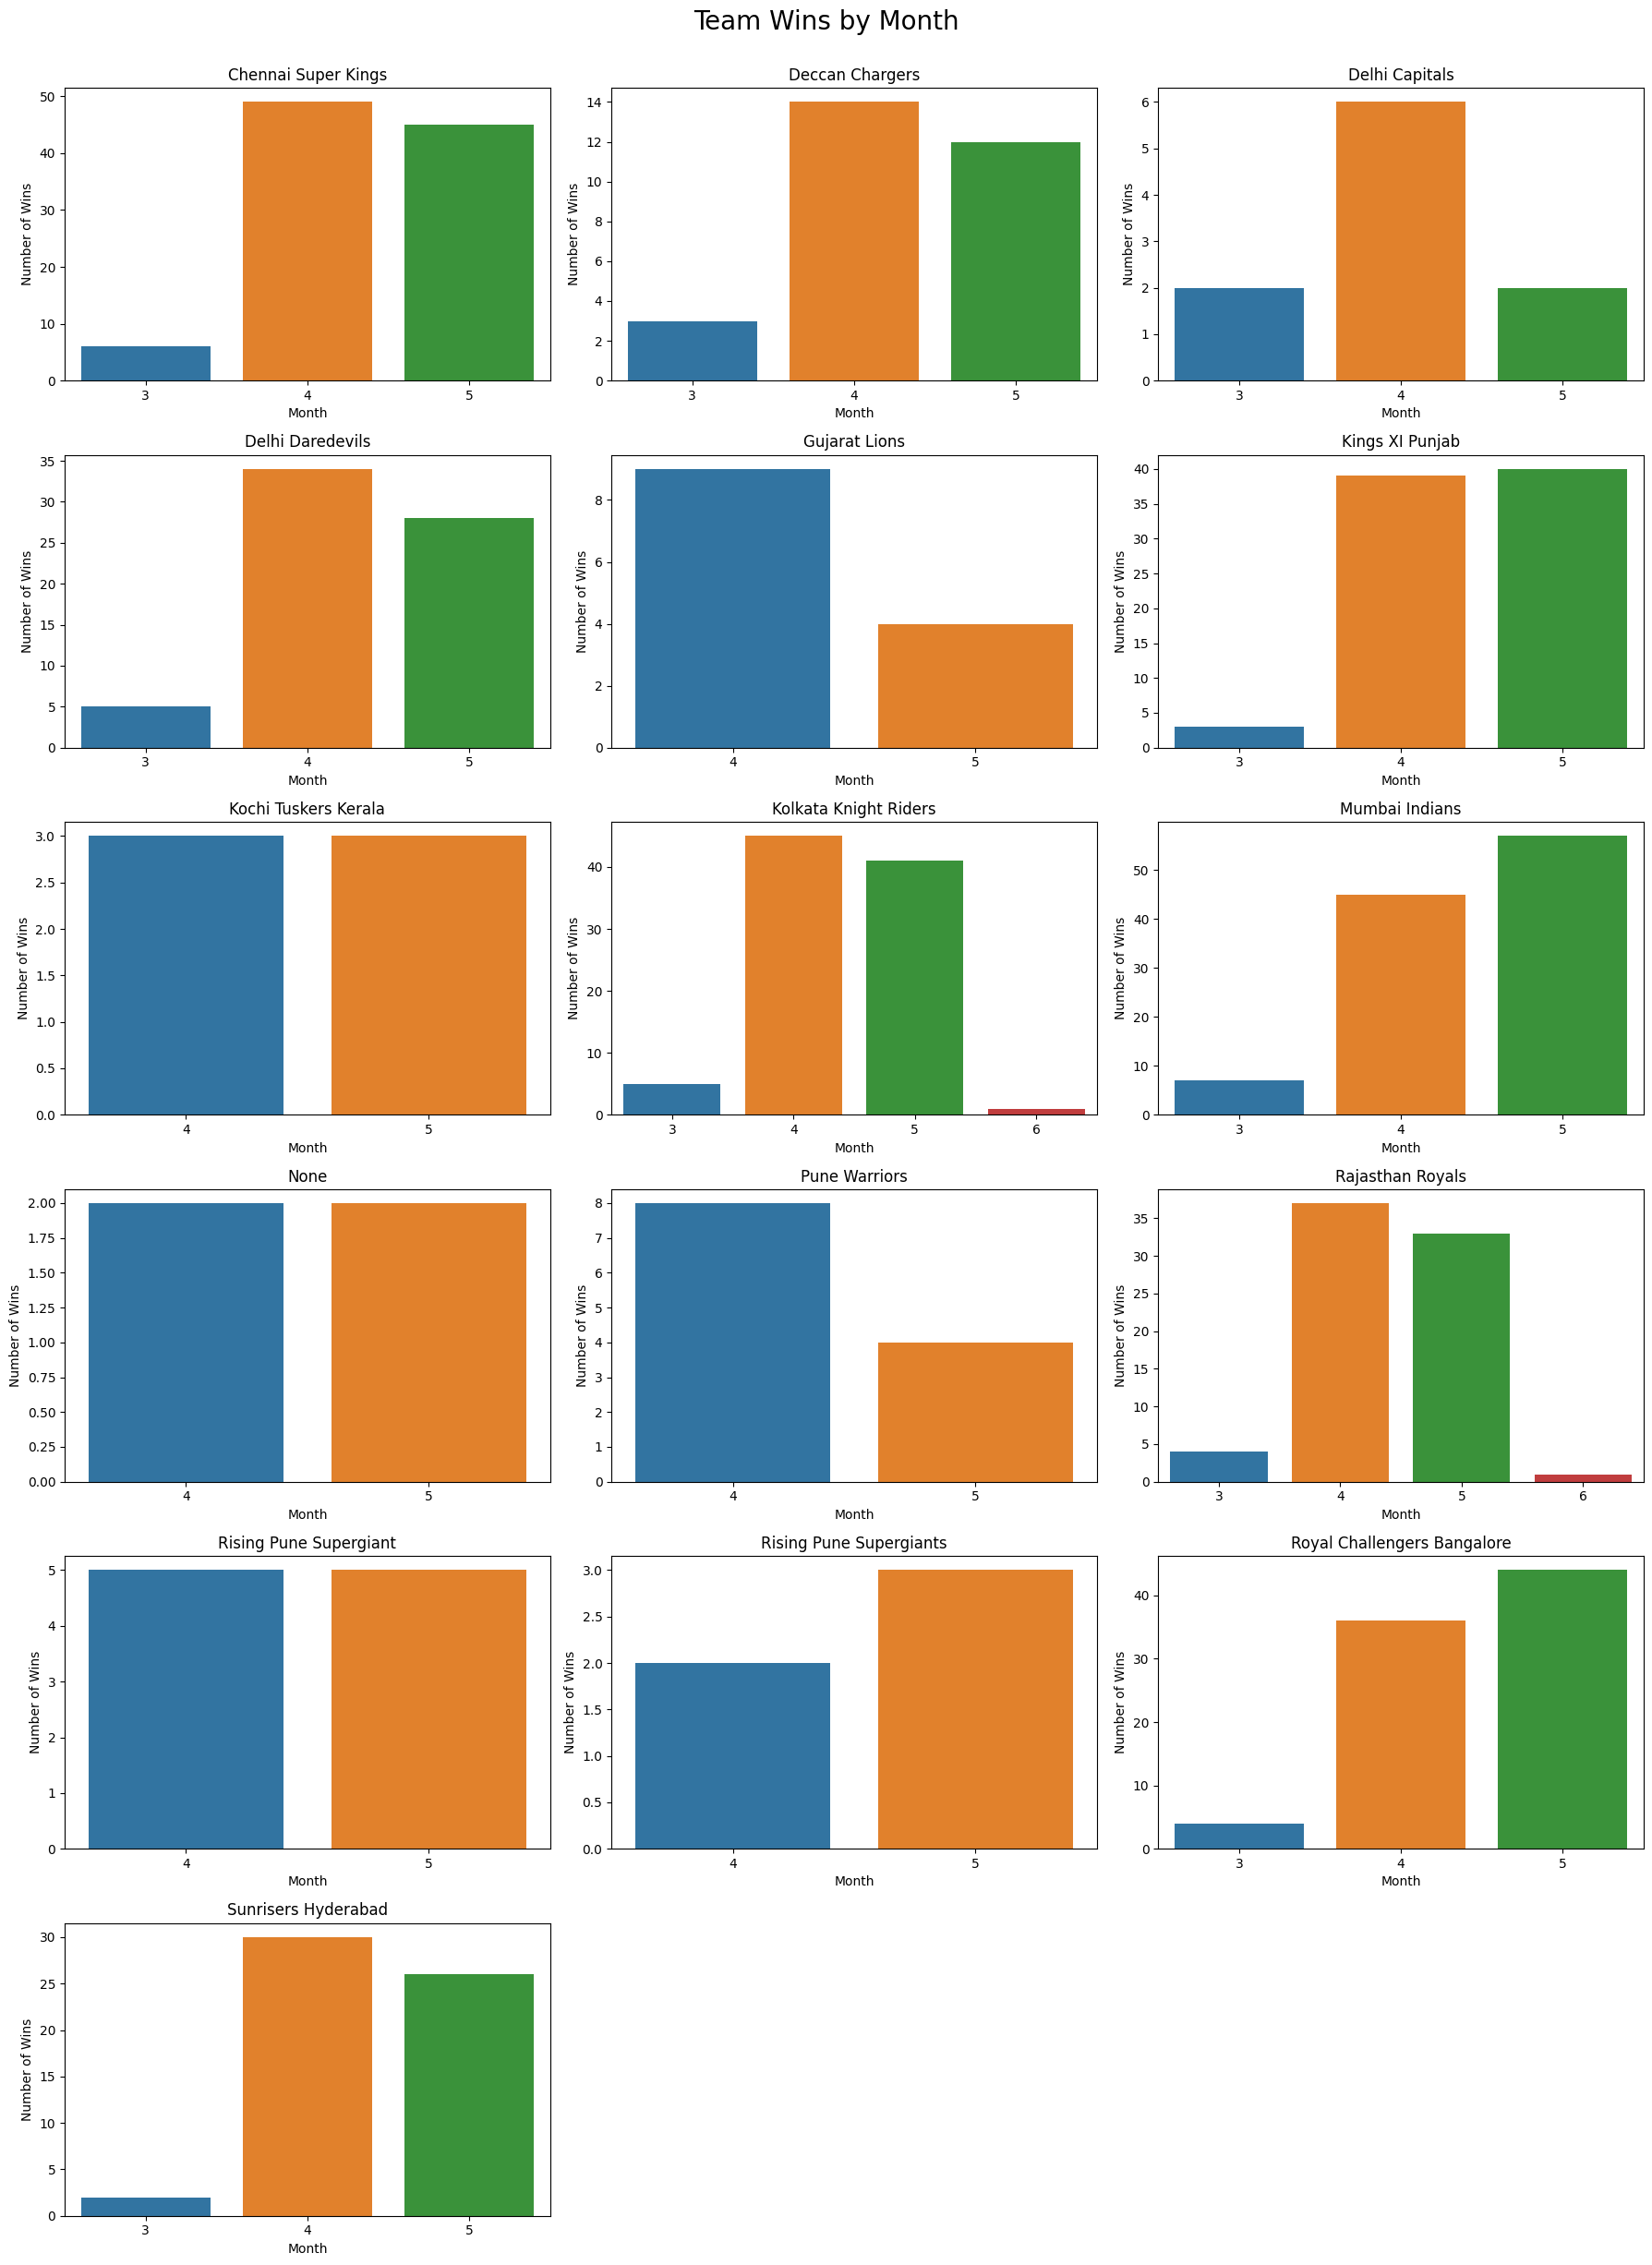

In [53]:
# Count of team wins by month
team_wins_by_months  = df.groupby(['winner', 'month'])['id'].count().reset_index(name='wins')

# Get a list of unique teams
teams = team_wins_by_months['winner'].unique()

# Set the number of rows and columns for the subplots
num_teams = len(teams)
num_cols = 3  # Set the number of columns for the subplot grid
num_rows = (num_teams + num_cols - 1) // num_cols  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten() 

# Loop through each team and create a subplot
for i, team in enumerate(teams):
    team_data = team_wins_by_months[team_wins_by_months['winner'] == team]
    sns.barplot(data=team_data, x='month', y='wins', ax=axes[i])
    axes[i].set_title(team)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Wins')
    axes[i].tick_params(axis='x')  # Rotate x-tick labels for better readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Team Wins by Month\n', fontsize=20, y=1.02)
plt.show()


> 📣 **Help Me Improve**
>
> If you found this notebook helpful, please consider giving it an upvote — it really helps!
>
> Your feedback is always welcome and appreciated.
>
> If you notice any issues, have suggestions, or just want to share your thoughts, feel free to leave a comment.
>
> Thanks a lot for your support and time!

---
© 2024 Saurabh Kudesia

*This project is licensed under the [MIT License](https://opensource.org/licenses/MIT). You are free to use, modify, and distribute this code, provided you include proper attribution and retain the license notice.* [![License: MIT](https://img.shields.io/badge/License-MIT-blue.svg)](https://opensource.org/licenses/MIT)